# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>File:</b> 02_Boulder<br>
<b>Last Edit:</b> 7/4/2016

Section 0: Preparing data <br>
Section 1: Distribution of Max Precipitation and Trends<br>
Section 2: Parameter Estimation, Distribution, and Trends

##  Section 0: Preparing data

In [1]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

Loading required package: fitdistrplus
Loading required package: MASS
Loading required package: survival
Loading required package: caTools
Loading required package: repr
Loading required package: IRdisplay


In [2]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [3]:
data = read.csv(file = "data/BOULDER_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [4]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 165

Check number of years in the data set.

In [5]:
data$YEAR[nrow(data)]-firstYear

[1] 116

In [6]:
table(data$MONTH)


  1   2   3   4   5   6   7   8   9  10  11  12 
117 117 117 117 117 117 117 117 117 117 117 117 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [7]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Distribution of Max Precipitation and Trends

In [8]:
data2012 = data[which(data$YEAR<2013),]

In [9]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

### Maximum Rainfall Trends

In [10]:
# create for maximum rainfall
maxTS = ts(data$Max.PRCP, start = firstYear, freq=12)

# create regression line
reg = lm(Max.PRCP. ~ month, data=data)

Slope of the regression line:

In [11]:
round(reg$coefficients[2],3)

month 
0.031

In [12]:
length(data$MONTH)*round(reg$coefficients[2],3)

month 
43.524

Although month isn't very predictive of maximum observed rainfall, there does appear to be an increase over the time data was collected.

In [13]:
maxTS2012 = ts(data2012$Max.PRCP, start = firstYear, freq=12)

In [14]:
maxTSNoEvent = maxTS

In [15]:
maxTSNoEvent[1389] = NA

In [16]:
maxObs = max(na.omit(data2012$Max.PRCP.))

In [17]:
smooth = runmean(data2012$Max.PRCP., 120)

In [18]:
smoothTS = ts(smooth, start=firstYear, freq=12)

In [19]:
which(data2012$Max.PRCP.==maxObs)

[1] 1060

In [20]:
data2012[1060,]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.,month
1060,GHCND:USC00050848,BOULDER CO US,1986,4,30,904,1060


In [21]:
setEPS()
postscript("pics/boulder2012.eps")
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1000))
dev.off()

png 
  2

In [22]:
setEPS()
postscript("pics/boulder2014.eps")
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,2500))
dev.off()

png 
  2

setEPS()
postscript("pics/.eps")
dev.off()

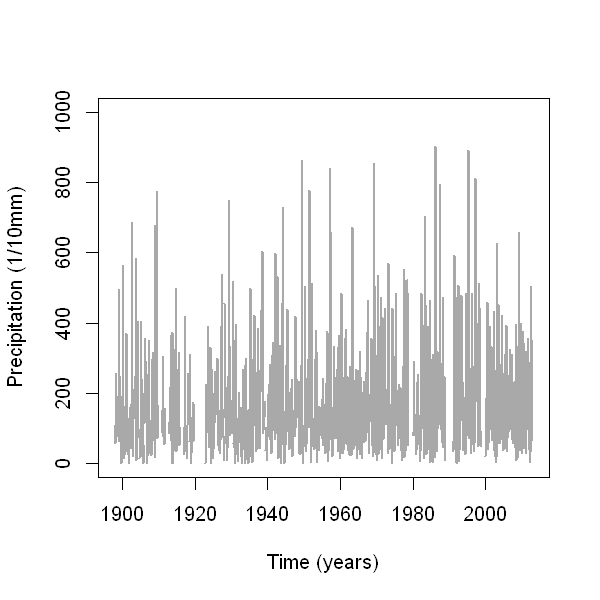

In [23]:
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1000))

In [24]:
setEPS()
postscript("pics/boulder2012Info.eps")
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1000))
abline(h=maxObs, col="red", lwd=.5, lty=5)
points(smoothTS, col=4, type="l", lwd=2)
text(1986,maxObs+50,
           sprintf("%i",maxObs))
dev.off()

png 
  2

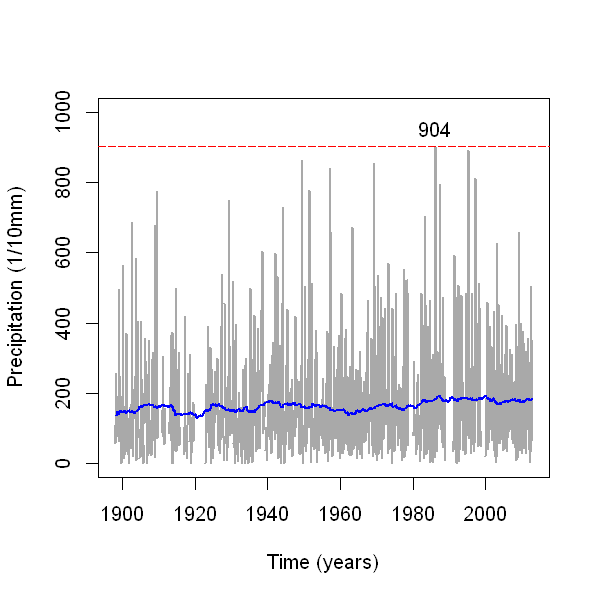

In [25]:
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1000))
abline(h=maxObs, col="red", lwd=.5, lty=5)
points(smoothTS, col=4, type="l", lwd=2)
text(1986,maxObs+50,
           sprintf("%i",maxObs))

In the time series plot, we also see that the peaks are gradually increasing over time, which is of specific interest to people working with maximum rainfall estimation. These increasing peaks have been wreaking havoc on Texas and the Eastern US this year. (Template statement - change as needed for individual stations).

Produce smoothed plots to get a better understanding of the trends.

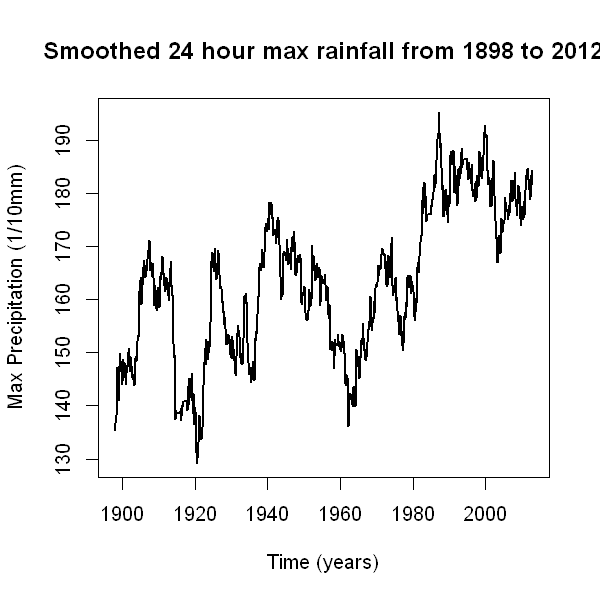

In [26]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2012")
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")

While the data shows a slight decrease in average rainfall at the tail end of our data (2014), the long term trend shows that average rainfall has been increasing. Empirically, we have had a wet year in 2016 that we would expect to match/exceed the long term observed increase in average maximum rainfall.(Template statement - change as needed for individual stations)

## Section 2: Parameter Estimation, Distribution, and Trends

In [28]:
mleGamma = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mle")
   mleGamma[i,1] = gamma1$estimate[1]
   mleGamma[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma[i,3] = gof$ks
   mleGamma[i,4] = gof$kstest
   mleGamma[i,5] = gof$cvm
   mleGamma[i,6] = gof$cvmtest
   mleGamma[i,7] = gof$ad
   mleGamma[i,8] = gof$adtest
}

mleGamma["invTheta"] = 1/(mleGamma$theta)
mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
mleGamma["sd"] = sqrt(mleGamma$var)

In [29]:
mleExp = data.frame(theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   exp1 = fitdist(as.vector(testDist),"exp",method = "mle")
   mleExp[i,1] = exp1$estimate[1]
   
   gof = gofstat(exp1)
   mleExp[i,2] = gof$ks
   mleExp[i,3] = gof$kstest
   mleExp[i,4] = gof$cvm
   mleExp[i,5] = gof$cvmtest
   mleExp[i,6] = gof$ad
   mleExp[i,7] = gof$adtest
}

mleExp["mean"] = 1/mleExp$theta
mleExp["square"] = mleExp$theta^2 
mleExp["var"] = 1/mleExp$square
mleExp["sd"] = sqrt(mleExp$var)

In [40]:
mleWB = data.frame(alpha = double(),theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP2[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   WB1 = fitdist(as.vector(testDist),"weibull",method = "mle")
   mleWB[i,1] = WB1$estimate[1]
   mleWB[i,2] = WB1$estimate[2]
   
   gof = gofstat(exp1)
   mleWB[i,3] = gof$ks
   mleWB[i,4] = gof$kstest
   mleWB[i,5] = gof$cvm
   mleWB[i,6] = gof$cvmtest
   mleWB[i,7] = gof$ad
   mleWB[i,8] = gof$adtest
}


#mleWB["mean"] = 1/mleWB$theta
#mleWB["square"] = mleWB$theta^2 
#mleWB["var"] = 1/mleWB$square
#mleWB["sd"] = sqrt(mleWB$var)

In [31]:
testDist = na.omit(max_PRCP[,i]) 
WB1 = fitdist(as.vector(testDist),"weibull",method = "mle")

In [32]:
WB1$estimate

shape      scale 
  1.129744 203.264967

In [44]:
head(mleWB)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest
0.9342517,142.2166,0.1188471,not rejected,0.3668456,rejected,2.840082,rejected
0.9107144,144.4591,0.1188471,not rejected,0.3668456,rejected,2.840082,rejected
0.9519022,159.4062,0.1188471,not rejected,0.3668456,rejected,2.840082,rejected
0.9501697,163.2204,0.1188471,not rejected,0.3668456,rejected,2.840082,rejected
1.0525052,169.3910,0.1188471,not rejected,0.3668456,rejected,2.840082,rejected
1.0191651,166.8905,0.1188471,not rejected,0.3668456,rejected,2.840082,rejected


In [45]:
which(mleWB$KStest=="rejected")

integer(0)

In [46]:
table(mleWB$KStest)


not rejected 
         108 

In [47]:
which(mleGamma$KStest=="rejected")

[1]  1  2  7  8  9 12 13 14 15 16 17 18 19 20 21 22 25 26 27 28 29 30 31 32 33
[26] 34 35 36 39 40 41 42 43 44 45 46 47

In [48]:
which(mleExp$KStest=="rejected")

[1]  13  14  21  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
[20]  55  56  57  61  62  67  68  69  70  73  74  75  76  81  82  83  87  95  98
[39] 100 101 102 103 104 105

In [49]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
0.7662871,0.005275478,0.1624008,rejected,0.8356680,NA,5.196257,NA,189.5563,145.2545,27533.91,165.9334
0.7426182,0.004984634,0.1442263,rejected,0.6983310,NA,4.539886,NA,200.6165,148.9815,29888.15,172.8819
0.8177342,0.005041738,0.1125168,not rejected,0.4371900,NA,2.975561,NA,198.3443,162.1929,32170.04,179.3601
0.7992070,0.004814416,0.1317502,not rejected,0.5563920,NA,3.534812,NA,207.7095,166.0029,34480.39,185.6889
0.9615450,0.005770623,0.1192384,not rejected,0.3512189,NA,2.309947,NA,173.2915,166.6276,28875.14,169.9269
0.9000838,0.005426620,0.1287402,not rejected,0.3326784,NA,2.205959,NA,184.2768,165.8645,30564.98,174.8284


In [50]:
head(mleExp)

theta,KS,KStest,CvM,CvMtest,AD,ADtest,mean,square,var,sd
0.006881695,0.10468826,not rejected,0.2941847,rejected,2.902581,rejected,145.3130,4.735772e-05,21115.88,145.3130
0.006714176,0.07942588,not rejected,0.1699337,not rejected,2.277768,rejected,148.9386,4.508016e-05,22182.71,148.9386
0.006167496,0.06812264,not rejected,0.1454369,not rejected,1.584073,rejected,162.1404,3.803801e-05,26289.49,162.1404
0.006024452,0.08463955,not rejected,0.2118668,not rejected,1.978488,rejected,165.9902,3.629402e-05,27552.75,165.9902
0.006003329,0.11109286,not rejected,0.2951964,rejected,2.030774,rejected,166.5743,3.603995e-05,27746.98,166.5743
0.006029810,0.10668369,not rejected,0.2043136,not rejected,1.575047,rejected,165.8427,3.635861e-05,27503.80,165.8427


In [51]:
trueEst = NULL
for(i in 1:nrow(mleExp)){
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"plot")
    }
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"exp")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"gamma")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"fail")
    }
}

In [52]:
table(trueEst)

trueEst
  exp  fail gamma  plot 
   25    12    32    39 

In [53]:
which(trueEst=="fail")

[1] 13 14 21 39 40 41 42 43 44 45 46 47

In [54]:
which(trueEst=="plot")

[1]   3   4   5   6  10  11  23  24  37  38  58  59  60  63  64  65  66  71  72
[20]  77  78  79  80  84  85  86  88  89  90  91  92  93  94  96  97  99 106 107
[39] 108

In [55]:
paste("plot",sprintf("%d",i),".eps",sep="")

[1] "plot108.eps"

In [56]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

In [57]:
for(i in 1:nrow(mleWB)){
jpeg(paste("pics/boulderCheck/plot",sprintf("%d",i),".jpg",sep=""))
par(mfrow=c(1,2))
plot(density(rweibull(10000,mleWB$alpha[i],mleWB$theta[i])))
hist(max_PRCP2[,i], breaks=30)
dev.off()
}


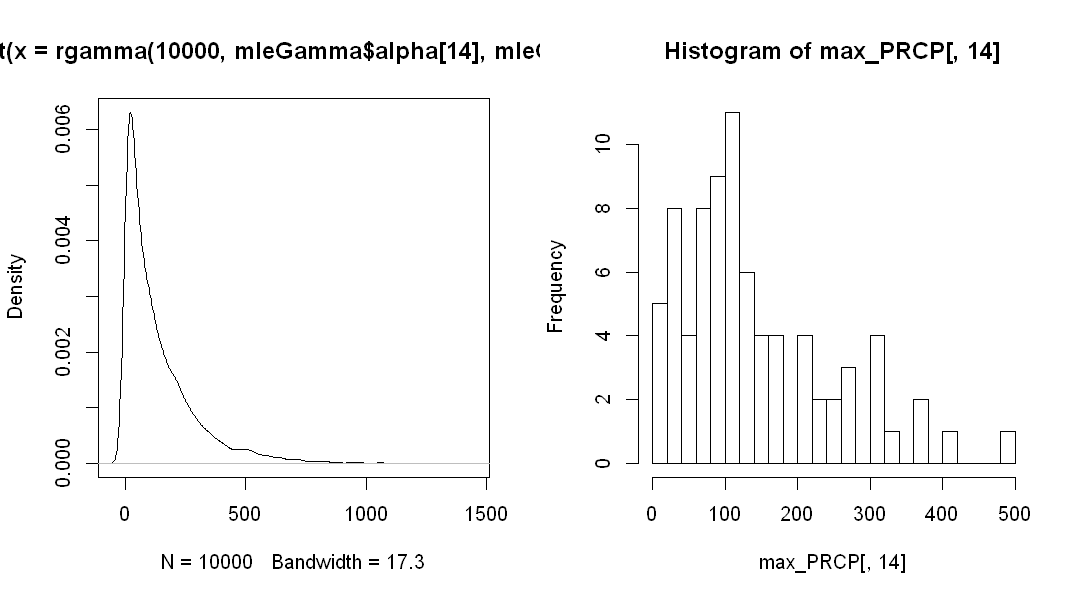

In [58]:
par(mfrow=c(1,2))
plot(density(rgamma(10000,mleGamma$alpha[14],mleGamma$theta[14])))
hist(max_PRCP[,14], breaks=20)

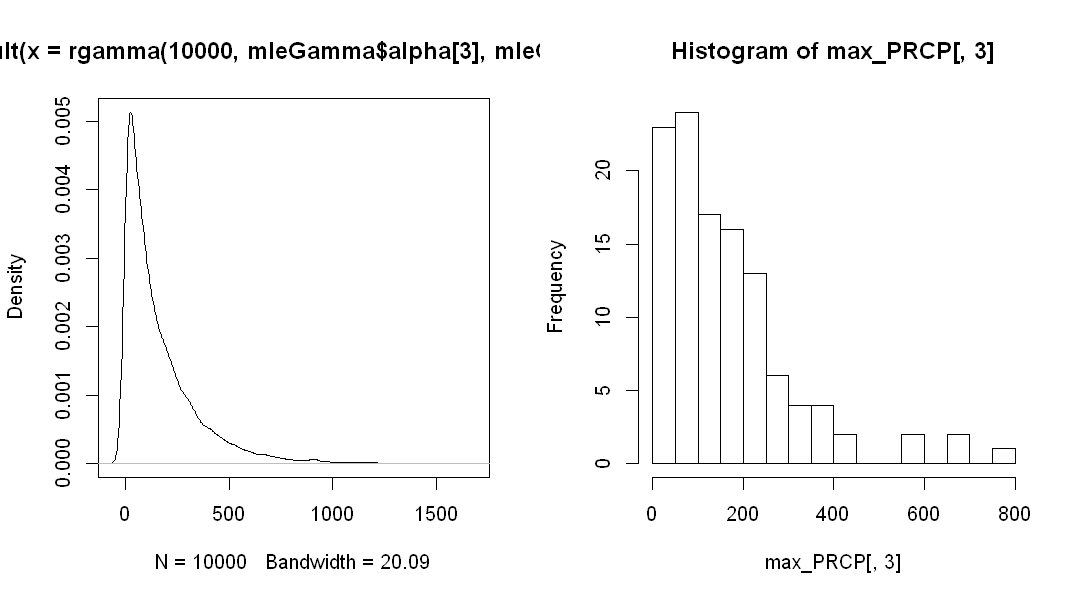

In [59]:
par(mfrow=c(1,2))
plot(density(rgamma(10000,mleGamma$alpha[3],mleGamma$theta[3])))
hist(max_PRCP[,3], breaks=20)

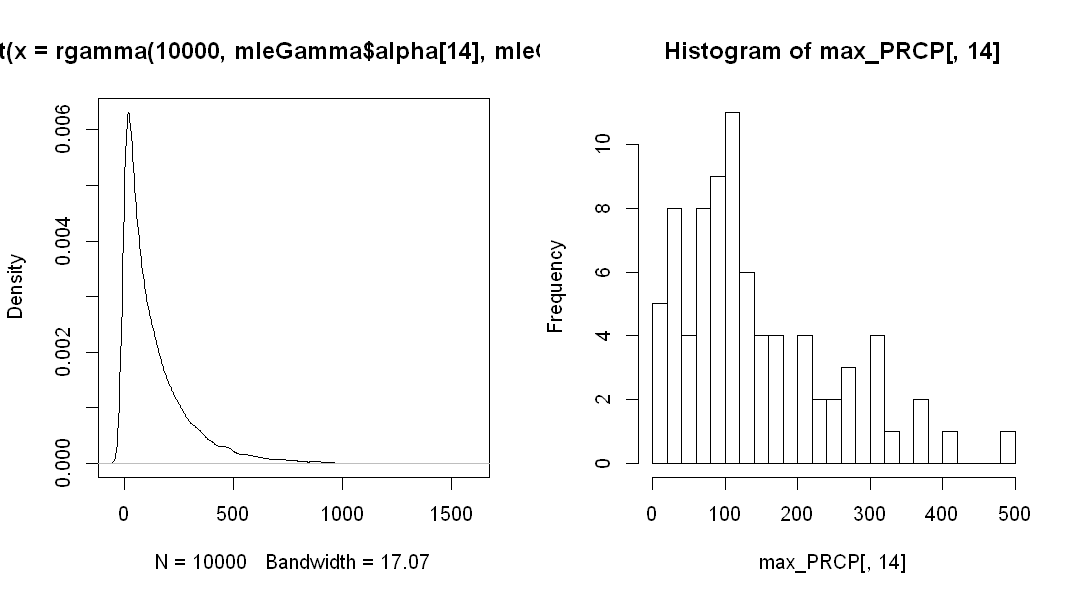

In [60]:
par(mfrow=c(1,2))
plot(density(rgamma(10000,mleGamma$alpha[14],mleGamma$theta[14])))
hist(max_PRCP[,14], breaks=20)

In [61]:
length(trueEst)

[1] 108

In [62]:
maxObs2 = max(na.omit(data$Max.PRCP.))

In [63]:
smooth2 = runmean(data$Max.PRCP., 120)

In [64]:
smoothTS2 = ts(smooth2, start=firstYear, freq=12)

In [65]:
setEPS()
postscript("pics/boulder2014Info.eps")
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,2500))
abline(h=maxObs2, col="red", lwd=.5, lty=5)
points(smoothTS2, col=4, type="l", lwd=2)
text(2013,maxObs2+100,sprintf("%i",maxObs2))
dev.off()

png 
  2

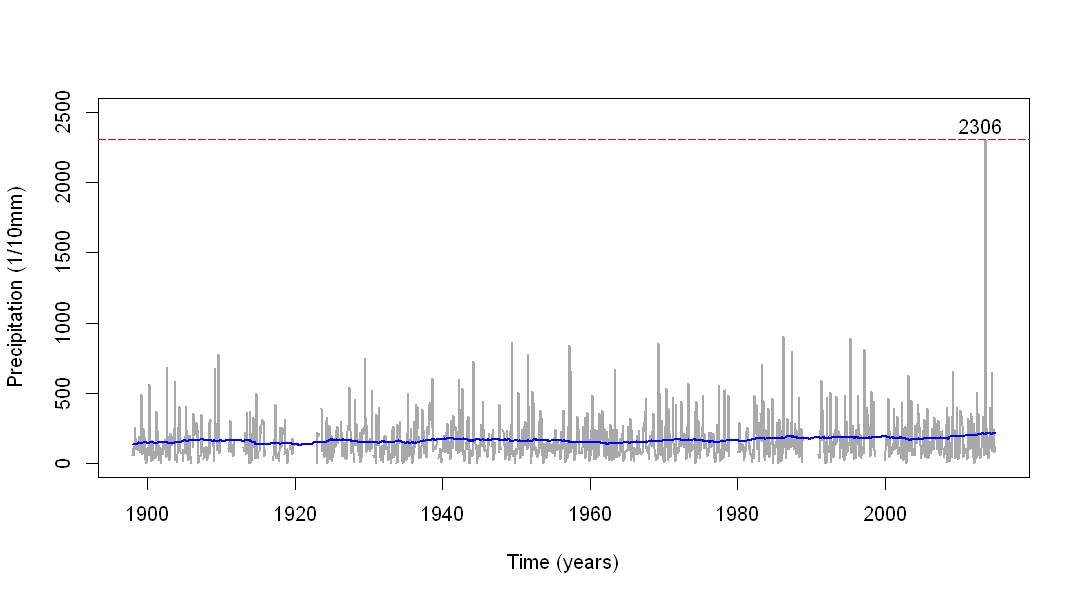

In [66]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,2500))
abline(h=maxObs2, col="red", lwd=.5, lty=5)
points(smoothTS2, col=4, type="l", lwd=2)
text(2013,maxObs2+100,sprintf("%i",maxObs2))

In [67]:
maxObs3 = maxObs

In [68]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

In [69]:
maxTSNoEvent = ts(maxTSNoEvent, start=1898, freq=12)

setEPS()
postscript("pics/.eps")
dev.off()

In [70]:
setEPS()
postscript("pics/ts2012.eps")
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
dev.off()

png 
  2

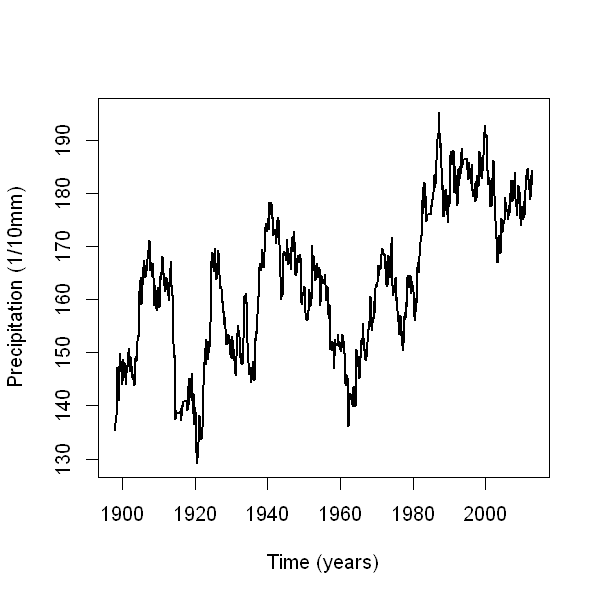

In [71]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )

In [72]:
setEPS()
postscript("pics/tsEvent.eps")
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, ylim=c(130,220)
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
dev.off()

png 
  2

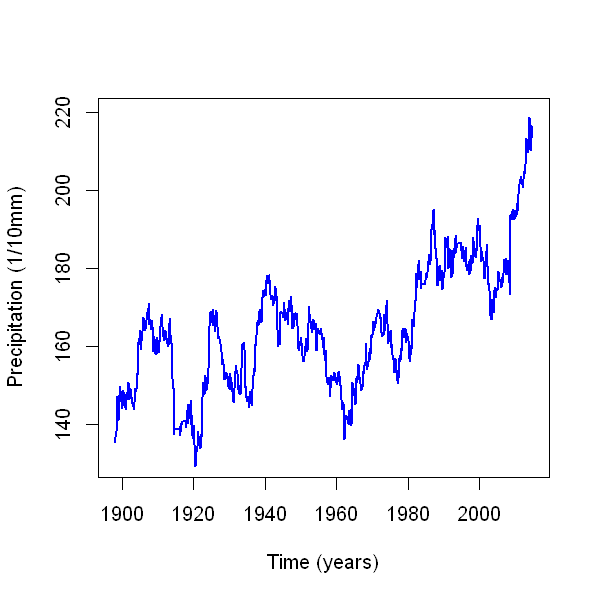

In [73]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, ylim=c(130,220)
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )

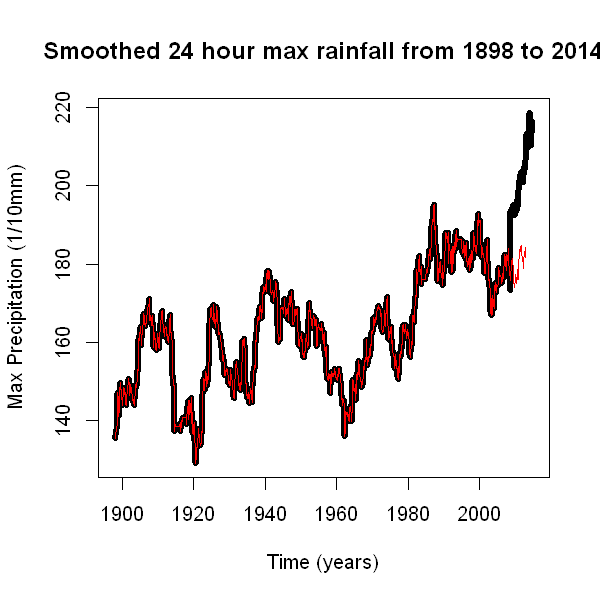

In [74]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=5,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2014")
lines(smoothTS, col=2)

In [75]:
means = apply(max_PRCP,2,mean)

In [76]:
sum(is.na(max_PRCP))

[1] 1642

Can't use the apply function with all the NAs

In [77]:
means = NULL
for(i in 1:ncol(max_PRCP)){
    means = c(means,mean(na.omit(max_PRCP[,i])))
}

In [78]:
meanTS = ts(means,start=firstYear)

In [79]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

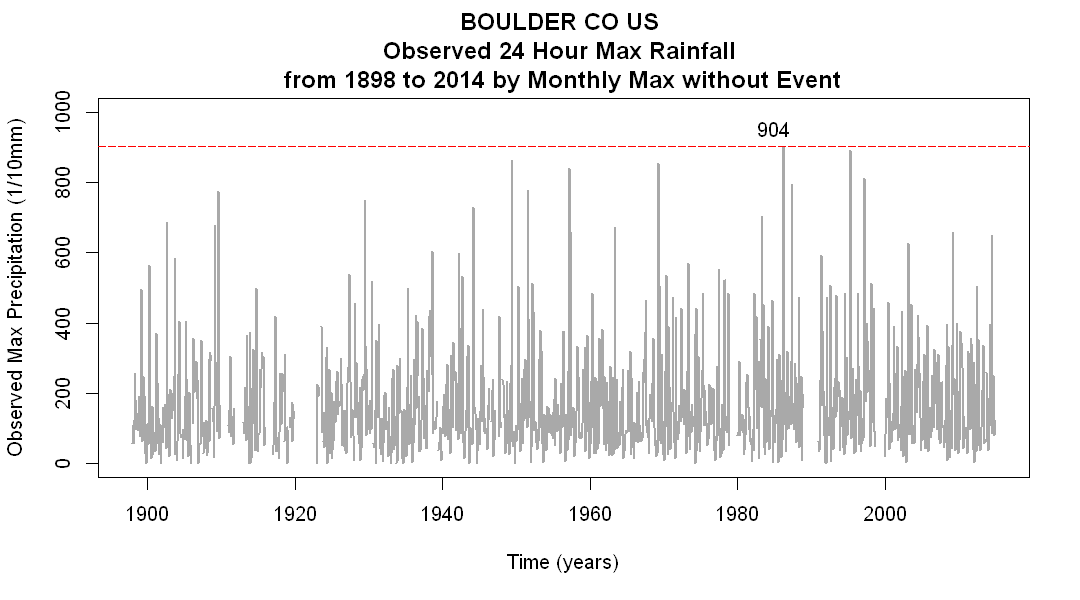

In [80]:
plot(maxTSNoEvent, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Observed Max Precipitation (1/10mm)", 
     main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2014 by Monthly Max without Event", 
     stationName,firstYear), ylim=c(0,1000), type="l")
abline(h=maxObs, col="red", lwd=.5, lty=5)
#points(smoothTS, col=4, type="l", lwd=2)
text(1985,maxObs3+50,sprintf("%i",maxObs3))

In [81]:
which(data$Max.PRCP.==maxObs2)

[1] 1389

In [82]:
data2= data

In [83]:
data2$Max.PRCP.[1389]=NA

In [84]:
smooth3 = runmean(data2$Max.PRCP., 120)

In [85]:
smoothTS3 = ts(smooth3, start = 1898, freq=12)

In [86]:
#create the first decade (first year and the following 9 years)
max_PRCP2 = data.frame(data2[which(data2$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
# i.e. 1898-1907, 1898-1908, etc
for(year in c((data2$YEAR[1] + 1):2005)){
    max_PRCP2 = cbind(max_PRCP2,data2[which(data2$YEAR >= year & data2$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP2) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP2[max_PRCP2==-999] = NA

In [87]:
means1 = NULL
for(i in 1:(length(max_PRCP)-2)){
    means1 = c(means1,mean(na.omit(max_PRCP[,i])))
}
means1TS = ts(means1, start = 1898)

In [88]:
vars1 = NULL
for(i in 1:(length(max_PRCP))){
    vars1 = c(vars1,var(na.omit(max_PRCP2[,i])))
}
vars1TS = ts(vars1, start = 1898)

In [89]:
means3 = NULL
for(i in 1:(length(max_PRCP))){
    means3 = c(means3,mean(na.omit(max_PRCP[,i])))
}
means3TS = ts(means3, start = 1898)

In [90]:
means2 = NULL
for(i in 1:length(max_PRCP2)){
    means2 = c(means2,mean(na.omit(max_PRCP2[,i])))
}
means2TS = ts(means2, start = 1898)

In [91]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

In [92]:
vars1TS

Time Series:
Start = 1898 
End = 2005 
Frequency = 1 
  [1] 15735.445 16735.987 21717.573 21413.277 20911.507 20214.089 19024.025
  [8] 19370.459 19138.029 20172.380 20669.951 19906.785 11160.880 11160.880
 [15] 12257.411 12257.411 12403.928 10693.007  9738.124  9159.137 10643.624
 [22] 12057.087 16897.540 16811.445 16855.751 15592.587 15460.528 15301.591
 [29] 16331.526 17620.114 16467.833 19074.140 15891.415 14795.405 14265.135
 [36] 17592.027 17560.073 20464.765 19856.686 18820.315 19267.625 15618.359
 [43] 19993.306 21174.749 24261.373 23429.325 23363.168 19541.288 18462.987
 [50] 19181.076 24157.529 24284.032 20359.226 20334.972 17473.730 15668.663
 [57] 17485.983 17917.805 18603.220 17700.123 12800.595 12895.826 18311.969
 [64] 19158.864 19788.176 19715.589 18549.150 19624.154 19825.643 19614.951
 [71] 20238.990 23020.257 18520.727 16617.942 15134.727 17396.821 20128.606
 [78] 20188.919 19639.970 25445.023 26833.222 24427.260 24427.260 26299.775
 [85] 28620.467 28642.189 25127.82

In [93]:
head(max_PRCP2)

1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
58,76,51,89,76,20,8,69,51,20,...,142,64,264,NA,20,119,112,18,58,127
107,107,107,33,61,132,64,69,NA,58,...,33,97,48,NA,84,94,74,81,66,66
58,495,114,163,160,211,254,191,114,53,...,239,74,513,NA,185,142,163,627,269,203
122,102,564,371,102,203,246,406,356,254,...,137,813,183,NA,152,391,36,300,241,234
257,64,305,168,137,127,406,241,241,351,...,485,229,117,NA,132,251,434,353,145,312
183,79,56,229,168,165,343,66,201,76,...,196,178,119,NA,216,97,226,178,282,165


In [94]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
0.7662871,0.005275478,0.1624008,rejected,0.8356680,NA,5.196257,NA,189.5563,145.2545,27533.91,165.9334
0.7426182,0.004984634,0.1442263,rejected,0.6983310,NA,4.539886,NA,200.6165,148.9815,29888.15,172.8819
0.8177342,0.005041738,0.1125168,not rejected,0.4371900,NA,2.975561,NA,198.3443,162.1929,32170.04,179.3601
0.7992070,0.004814416,0.1317502,not rejected,0.5563920,NA,3.534812,NA,207.7095,166.0029,34480.39,185.6889
0.9615450,0.005770623,0.1192384,not rejected,0.3512189,NA,2.309947,NA,173.2915,166.6276,28875.14,169.9269
0.9000838,0.005426620,0.1287402,not rejected,0.3326784,NA,2.205959,NA,184.2768,165.8645,30564.98,174.8284


In [95]:
mleGam1 = ts(mleGamma$var, start=1898, freq=12)
mleGamSD = ts(mleGamma$sd, start=1898, freq=12)

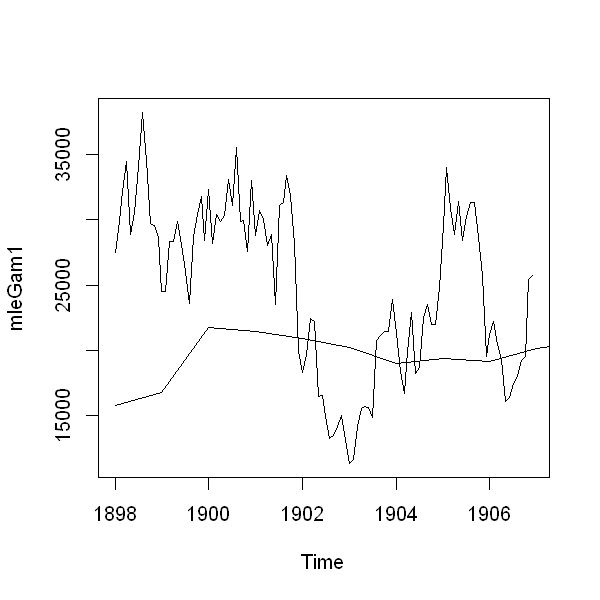

In [96]:
plot(mleGam1,type="l")
lines(vars1TS)

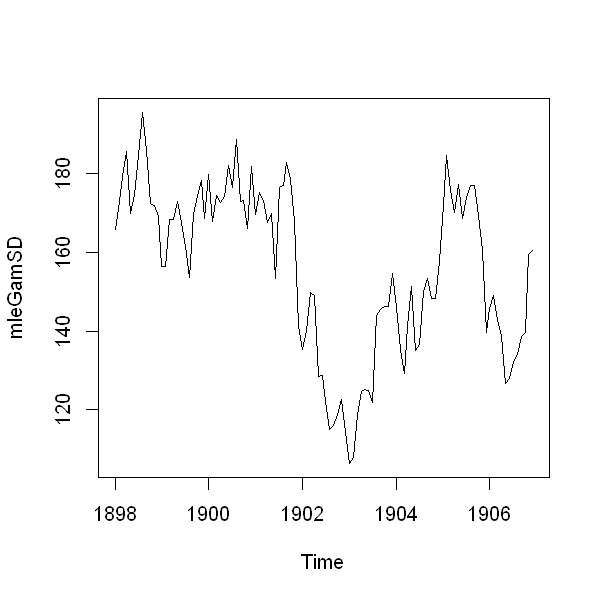

In [97]:
plot(mleGamSD,type="l")

In [98]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

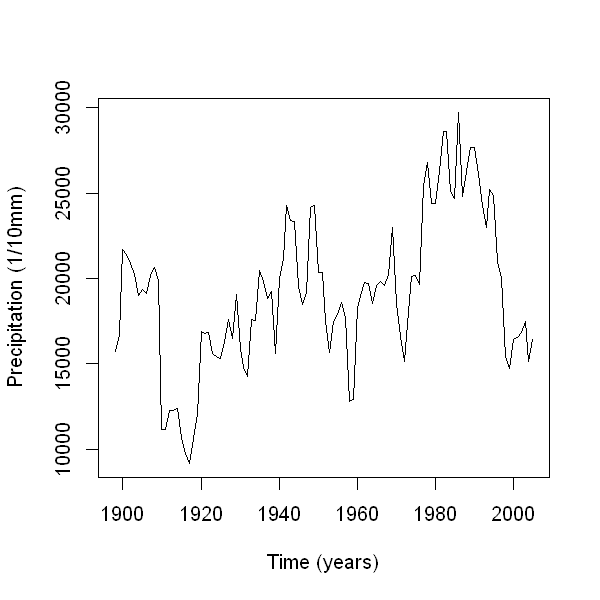

In [99]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(vars1TS, type="l", xlab = "Time (years)", lwd=1,
    ylab = "Precipitation (1/10mm)", col = 1)

In [243]:
options(repr.plot.width=7, repr.plot.height=6) #reduces the plot sizes

In [250]:
setEPS()
postscript("pics/var1.eps")
plot(vars1TS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)
legend("topleft",c("Variance of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")
dev.off()

png 
  2

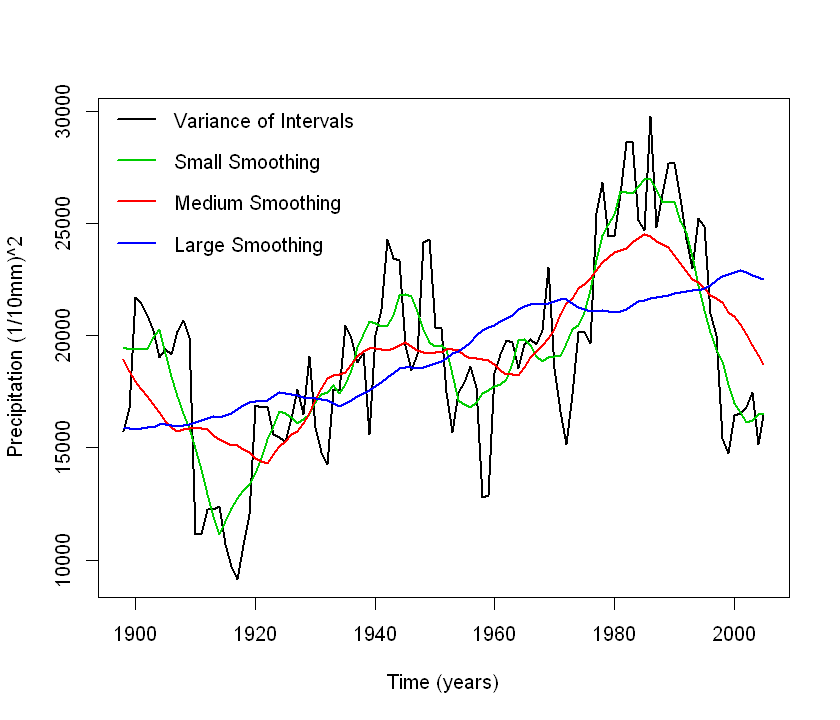

In [251]:
rollSmall = ts(runmean(vars1TS,10),start=1898)
rollSmall2 = ts(runmean(vars1TS,25),start=1898)
rollSmall3 = ts(runmean(vars1TS,50),start=1898)
plot(vars1TS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)
legend("topleft",c("Variance of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")

In [248]:
length(rollSmall)

[1] 108

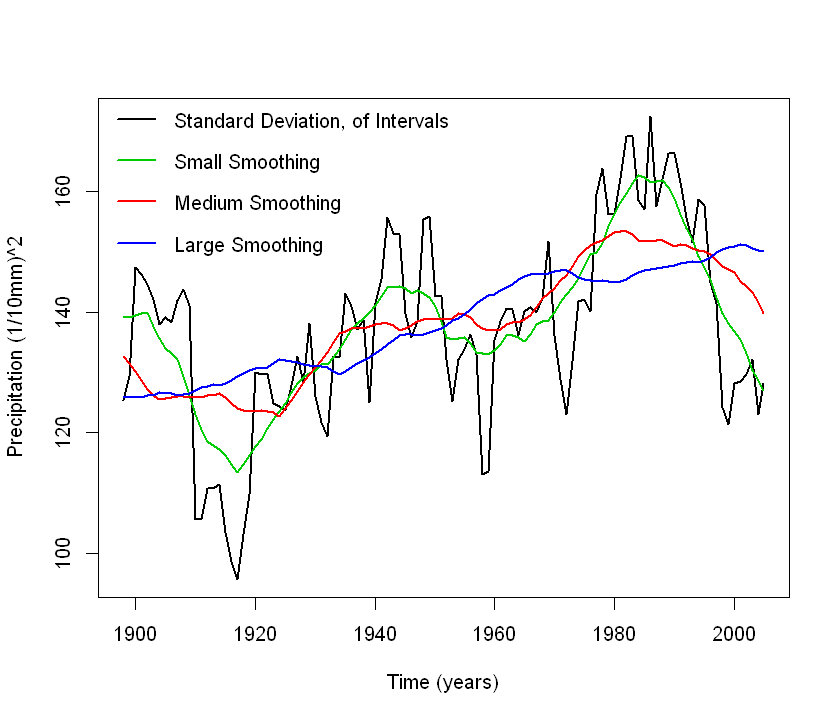

In [102]:
rollSmall = ts(runmean(vars1TS,15),start=1898)
rollSmall2 = ts(runmean(vars1TS,30),start=1898)
rollSmall3 = ts(runmean(vars1TS,50),start=1898)
plot(sqrt(vars1TS), type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(sqrt(rollSmall), col=3,lwd=2)
lines(sqrt(rollSmall2), col=2,lwd=2)
lines(sqrt(rollSmall3), col=4,lwd=2)
legend("topleft",c("Standard Deviation, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")

In [103]:
setEPS()
postscript("pics/eventComp1.eps")
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
#lines(smoothTS3, col=2, lwd=2)
lines(smoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS prior to event"), lty = c(1,0,1),col=c(4,0,1),
      lwd=c(2,0,2), bty="n", cex = 1, pt.cex=1)
dev.off()

png 
  2

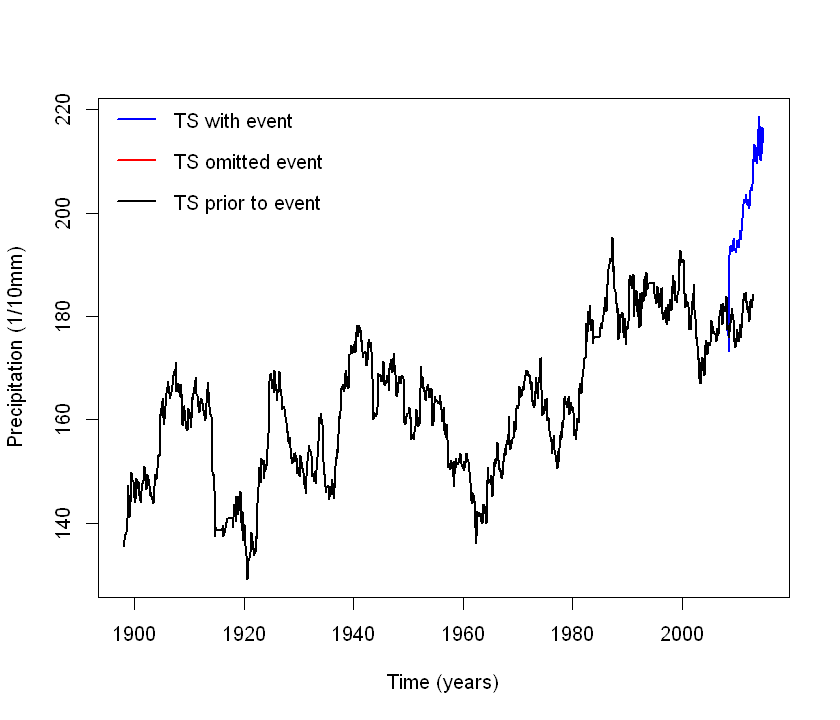

In [104]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
#lines(smoothTS3, col=2, lwd=2)
lines(smoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS omitted event","", "TS prior to event"), lty = c(1,0,1,0,1),col=c(4,0,2,0,1),
      lwd=c(2,0,2,0,2), bty="n", cex = 1, pt.cex=1)

In [105]:
length(smoothTS2)-1284

[1] 120

In [106]:
truncSmoothTS = ts(smoothTS[1284:1320], start=2004, freq=12)
truncSmoothTS2 = ts(smoothTS2[1284:length(smoothTS2)], start=2004, freq=12)
truncSmoothTS3 = ts(smoothTS3[1284:length(smoothTS3)], start=2004, freq=12)

In [107]:
setEPS()
postscript("pics/eventComp2.eps")
#rollSmall = runmean(data$Max.PRCP., 300)
plot(truncSmoothTS2, type="l", xlab = "Time (years)", lwd=4,
    ylab = "Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(truncSmoothTS3, col=2, lwd=3)
lines(truncSmoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS omitted event","", "TS prior to event"), lty = c(1,0,1,0,1),col=c(4,0,2,0,1),
      lwd=c(2,0,2,0,2), bty="n", cex = 1, pt.cex=1)
dev.off()

png 
  2

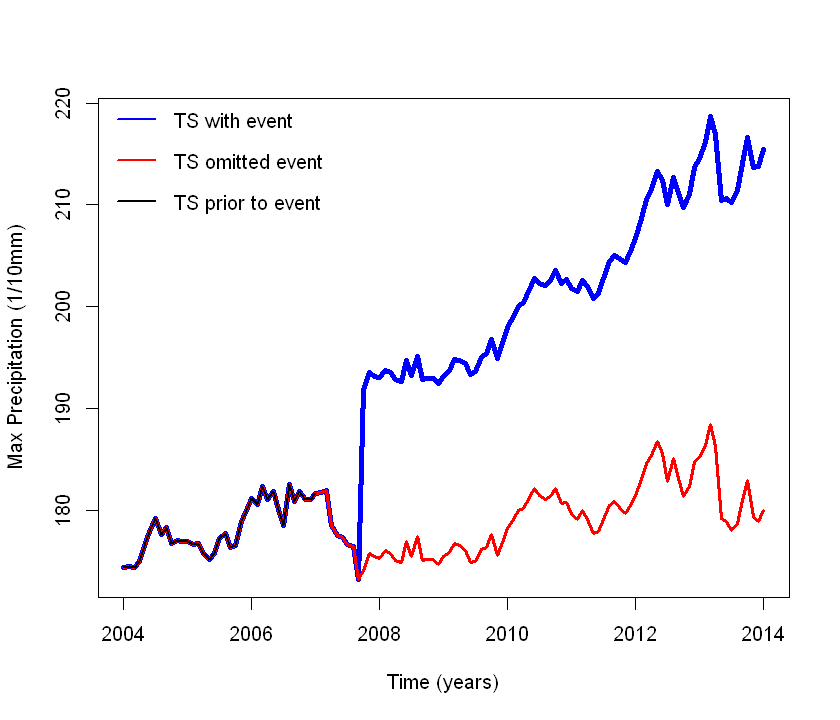

In [108]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(truncSmoothTS2, type="l", xlab = "Time (years)", lwd=4,
    ylab = "Max Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(truncSmoothTS3, col=2, lwd=3)
lines(truncSmoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS omitted event","", "TS prior to event"), lty = c(1,0,1,0,1),col=c(4,0,2,0,1),
      lwd=c(2,0,2,0,2), bty="n", cex = 1, pt.cex=1)

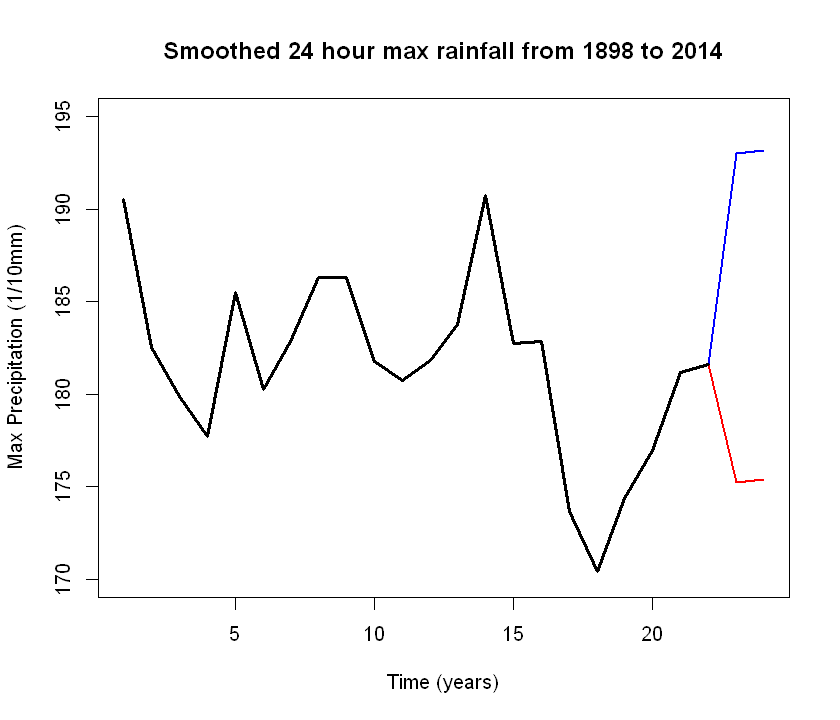

In [109]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(means2[85:length(means2)], type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 2, main="Smoothed 24 hour max rainfall from 1898 to 2014",
    ylim=c(170,195))
lines(means3[85:length(means2)], col=4, lwd=2)
lines(means1[85:length(means2)], col=1, lwd=3)

In [110]:
smoothALL = runmean(data2$Max.PRCP., 1404/2)

In [111]:
smoothAllTS = ts(smoothALL, start=1898, freq = 12)

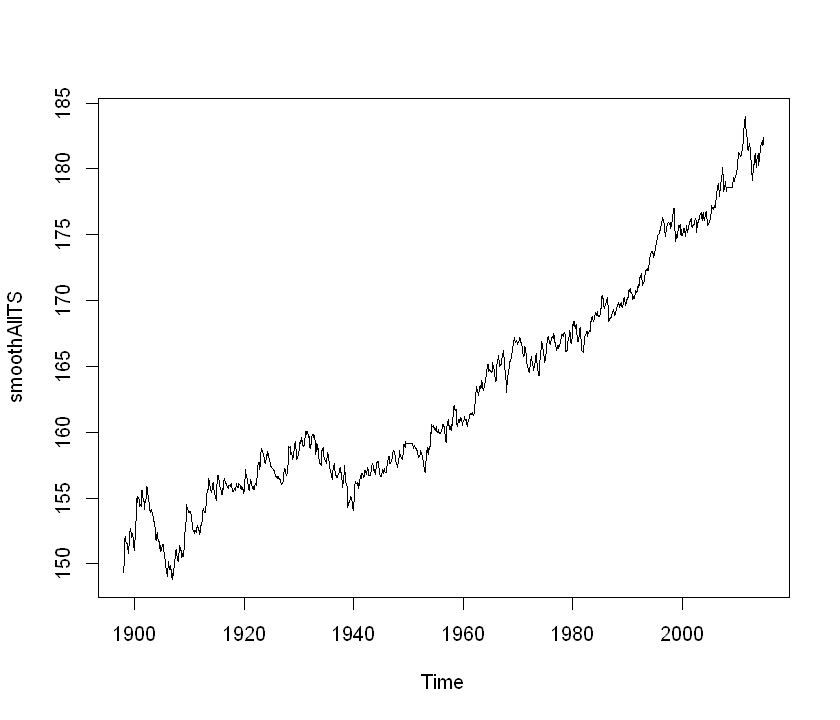

In [112]:
plot(smoothAllTS, type="l")

In [113]:
smoothALLEvent = runmean(data$Max.PRCP., 1404/2)

In [114]:
smoothAllEventTS = ts(smoothALLEvent, start = 1898, freq = 12)

In [115]:
setEPS()
postscript("pics/longTerm.eps")
plot(smoothAllEventTS, type="l", col="blue", ylab="Smoothed Precipitation (1/10mm)", xlab="Time (years)")
lines(smoothAllTS)
legend("topleft",c("Smoothing with Event","", "Smoothing without Event"), col = c(4,0,1),, lty=c(1,0,1), bty="n")
dev.off()

png 
  2

In [116]:
length(smoothAllTS)

[1] 1404

In [117]:
1404/2

[1] 702

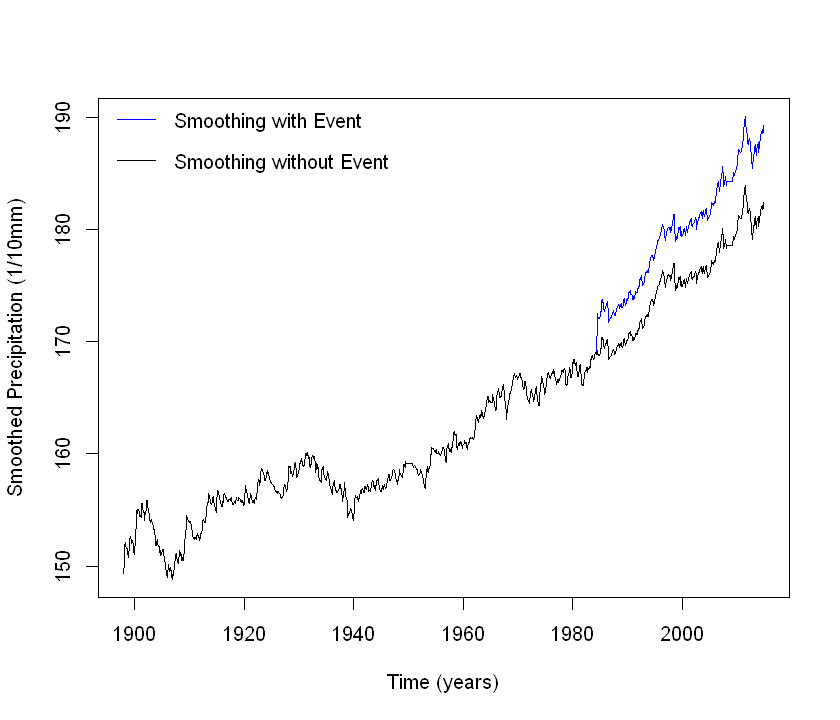

In [118]:
plot(smoothAllEventTS, type="l", col="blue", ylab="Smoothed Precipitation (1/10mm)", xlab="Time (years)")
lines(smoothAllTS)
legend("topleft",c("Smoothing with Event","", "Smoothing without Event"), col = c(4,0,1),, lty=c(1,0,1), bty="n")

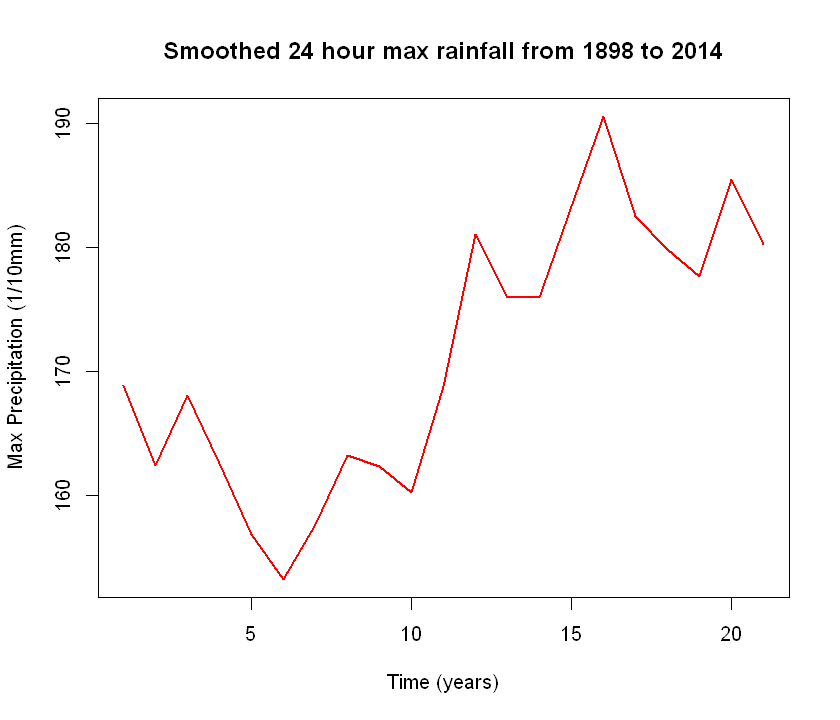

In [119]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(means1TS[70:90], type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 2, main="Smoothed 24 hour max rainfall from 1898 to 2014")

In [120]:
means1TS

Time Series:
Start = 1898 
End = 2003 
Frequency = 1 
  [1] 145.3130 148.9386 162.1404 165.9902 166.5743 165.8427 162.6517 161.6264
  [9] 166.2444 163.5000 160.4568 160.8025 138.6203 138.6203 140.8529 140.8529
 [17] 141.5938 139.0938 133.1429 134.0135 150.6622 150.1486 168.9211 165.7011
 [25] 163.0606 157.6036 152.7456 149.5133 148.5826 154.0087 149.6261 160.0351
 [33] 145.8393 146.9821 153.4821 166.2500 166.5133 173.5263 177.6106 172.7500
 [41] 173.9630 160.9541 168.8018 167.3393 171.6786 164.5893 168.5536 161.2500
 [49] 156.7257 159.3652 165.3950 164.5417 164.1333 163.4500 156.4750 151.7750
 [57] 151.2750 150.9583 152.0833 145.1917 142.1000 143.3500 148.3833 151.6000
 [65] 150.0250 155.1250 155.6000 162.2833 165.7333 168.9167 162.4667 168.1176
 [73] 162.6262 156.8962 153.3019 157.6667 163.2308 162.3846 160.2788 168.7885
 [81] 181.0385 175.9905 175.9905 183.3404 190.5319 182.5053 179.8842 177.6947
 [89] 185.4842 180.2737 182.8280 186.3077 186.3077 181.7670 180.7282 181.8252
 [97] 183.

In [121]:
means1TS[81]

[1] 181.0385

In [122]:
data1st = data[which(data$YEAR<=1981),]
data2nd = data[-which(data$YEAR<=1981),]

In [123]:
mean1sthalf = mean(na.omit(data1st$Max.PRCP.))
v1 = var(na.omit(data1st$Max.PRCP.))
mean2ndhalf = mean(na.omit(data2nd$Max.PRCP.))
v2 = var(na.omit(data2nd$Max.PRCP.))

In [124]:
unique(data1st$YEAR)

[1] 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912
[16] 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
[31] 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942
[46] 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
[61] 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
[76] 1973 1974 1975 1976 1977 1978 1979 1980 1981

In [125]:
anotherTS = smoothTS

In [126]:
require(changepoint)

Loading required package: changepoint
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Successfully loaded changepoint package version 2.2.1
 NOTE: Predefined penalty values have changed.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


In [127]:
cpTest = sort(smoothTS)

In [128]:
cpTest[652]

[1] 162.4667

In [129]:
cpTest[645:680]

[1] 162.2833 162.3168 162.3273 162.3846 162.3902 162.3929 162.4250 162.4667
 [9] 162.5146 162.5375 162.5618 162.6000 162.6190 162.6226 162.6262 162.6273
[17] 162.6500 162.6517 162.6538 162.6627 162.6964 162.7522 162.7667 162.7917
[25] 162.8000 162.8173 162.8500 162.8917 162.8917 162.9231 162.9327 162.9583
[33] 163.0606 163.0750 163.1167 163.1239

In [130]:
cpt.mean(cpTest)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              date version data.set cpttype method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Sep 13 17:22:34 2016 

summary(.)  :
----------
Created Using changepoint version 2.2.1 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 21.68952 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 652 

In [131]:
cpt.mean(anotherTS)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              date version data.set cpttype method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Sep 13 17:22:34 2016 

summary(.)  :
----------
Created Using changepoint version 2.2.1 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 21.68952 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 1007 

In [132]:
setEPS()
postscript("pics/qq1.eps")
qqnorm(smoothTS);qqline(smoothTS)
dev.off()

png 
  2

In [133]:
shapiro.test(smoothTS)


	Shapiro-Wilk normality test

data:  smoothTS
W = 0.98121, p-value = 1.981e-12


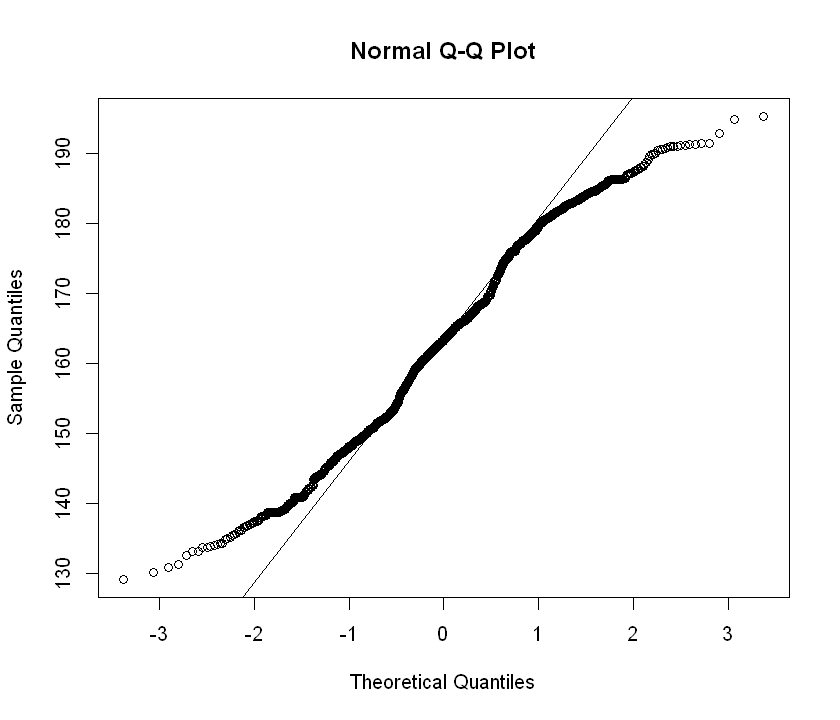

In [134]:
qqnorm(smoothTS);qqline(smoothTS)

In [135]:
setEPS()
postscript("pics/tri.eps")
hist(smoothTS,breaks=40,xlab="Precipitation (1/10mm)", main="")
dev.off()

png 
  2

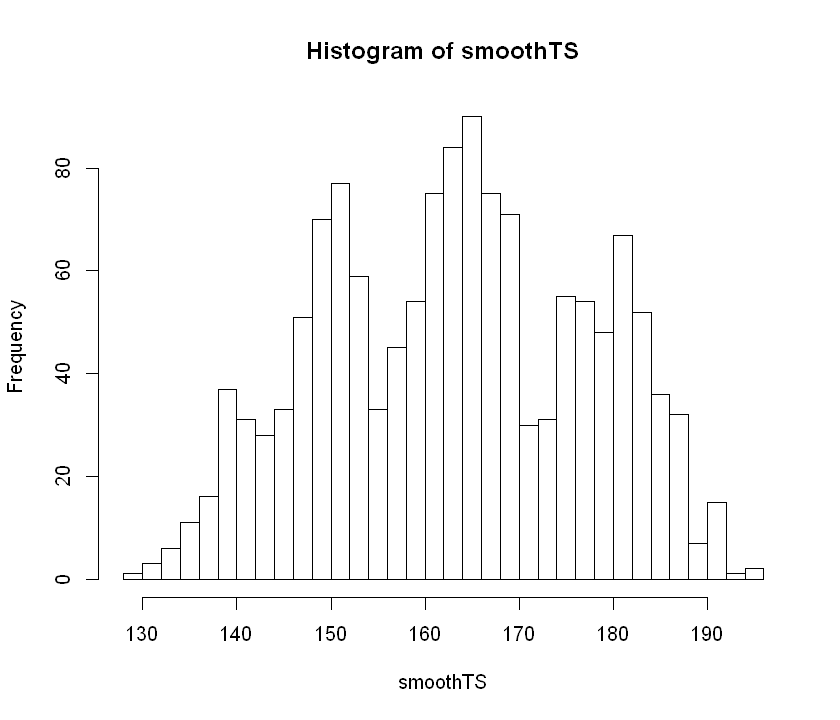

In [136]:
hist(smoothTS,breaks=40)

In [137]:
smoothTS[998:1010]

[1] 159.6442 159.5000 166.0385 166.9712 166.0000 166.8558 165.4904 165.1731
 [9] 166.2019 168.1058 168.7885 169.6635 170.7692

In [138]:
anotherTS[998:1002]

[1] 159.6442 159.5000 166.0385 166.9712 166.0000

In [139]:
996/12

[1] 83

In [140]:
1897+83

[1] 1980

In [141]:
length(smoothTS)/12

[1] 115

In [142]:
anotherTS[1:1007] = mean1sthalf
anotherTS[1008:length(smoothTS)] = mean2ndhalf

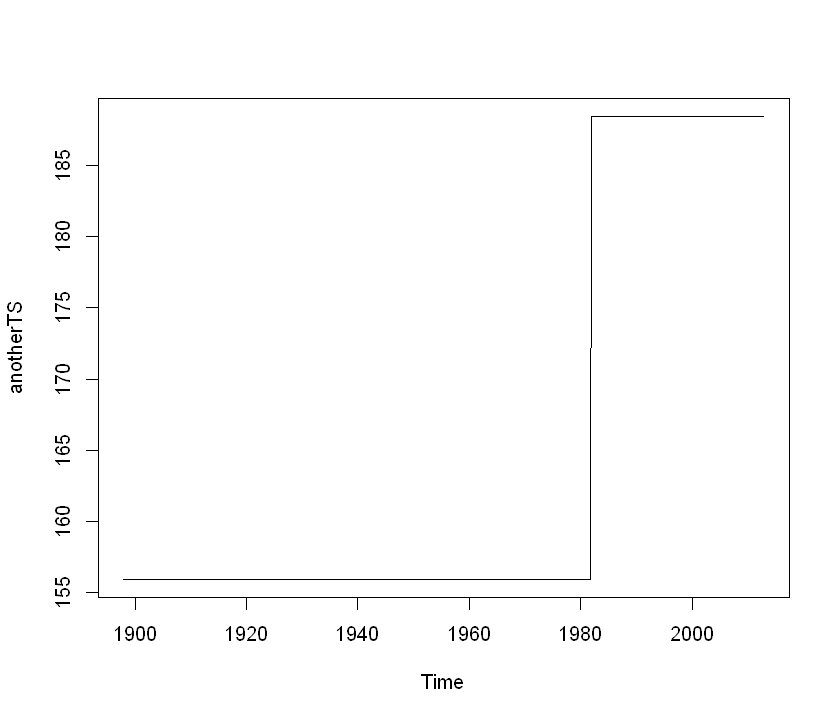

In [143]:
plot(anotherTS)

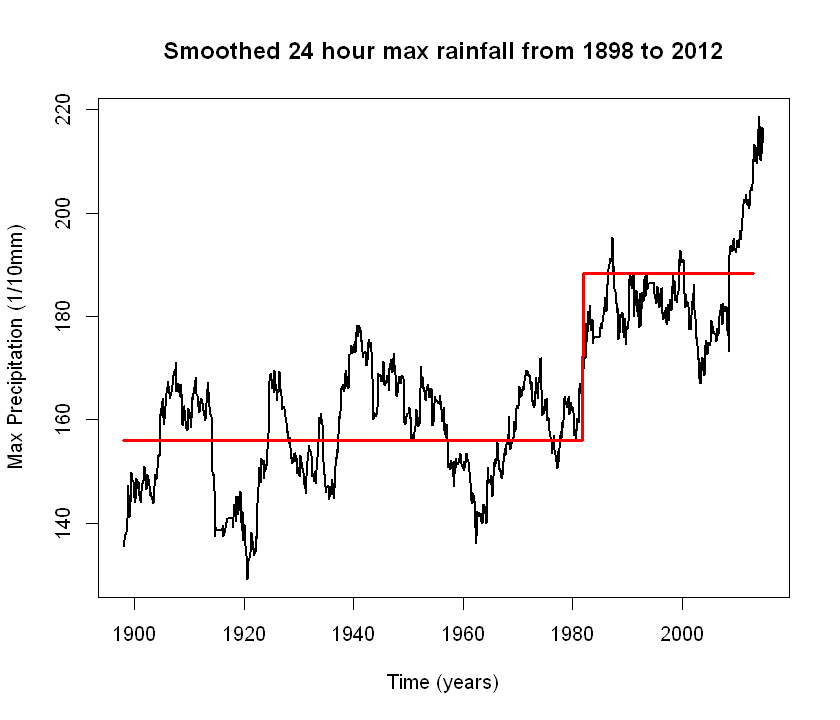

In [144]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2012")
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS,col=2,lwd=3)

In [145]:
data1st2 = data2[which(data2$YEAR<=1981),]
data2nd2 = data2[-which(data2$YEAR<=1981),]

In [146]:
mean1sthalf2 = mean(na.omit(data1st2$Max.PRCP.))
mean2ndhalf2 = mean(na.omit(data2nd2$Max.PRCP.))

In [147]:
mean2ndhalf

[1] 188.4023

In [148]:
mean2ndhalf2

[1] 182.3864

In [149]:
anotherTS2 = anotherTS

In [150]:
anotherTS2[1:1007] = mean1sthalf2
anotherTS2[1008:length(smoothTS)] = mean2ndhalf2

In [151]:
mean1sthalf2

[1] 155.9537

In [152]:
mean2ndhalf2

[1] 182.3864

In [153]:
smoothTS[1048]

[1] 177.6238

setEPS()
postscript("pics/.eps")
dev.off()

In [154]:
setEPS()
postscript("pics/changeTS.eps")
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS2,col=2,lwd=3)
    legend("topleft",c("Trend Line","","Means left and right of change point"), lty=c(1,0,1), lwd=c(2,0,2), col=c(1,0,2),
    bty="n", cex = .8, pt.cex=.8)
dev.off()

png 
  2

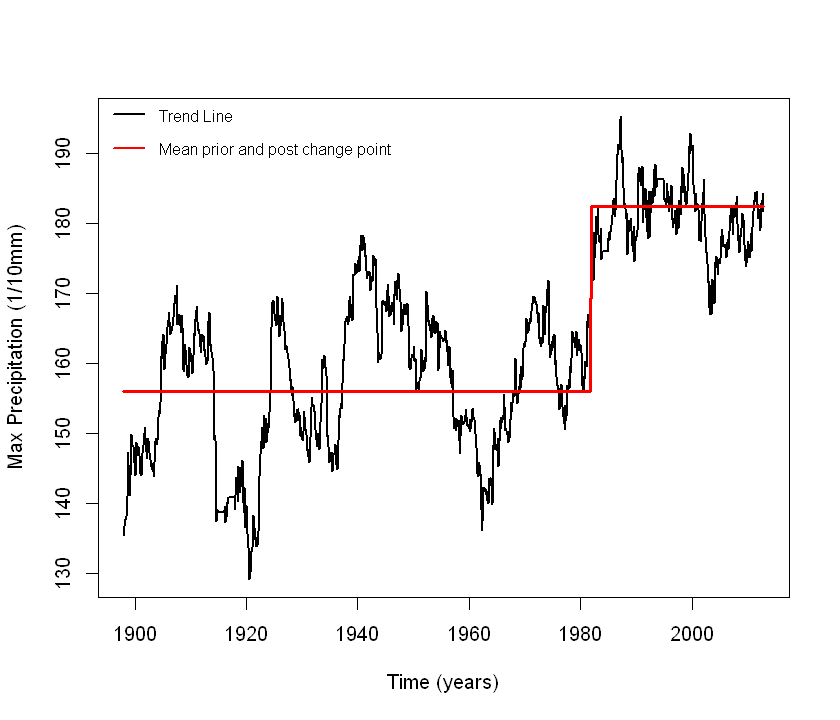

In [155]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS2,col=2,lwd=3)
    legend("topleft",c("Trend Line","","Mean prior and post change point"), lty=c(1,0,1), lwd=c(2,0,2), col=c(1,0,2),
    bty="n", cex = .8, pt.cex=.8)

In [156]:
length(smoothTS)

[1] 1380

In [157]:
length(smoothTS2)

[1] 1404

In [158]:
data["box"] = as.numeric(data$YEAR>=1981)

In [159]:
data2["box"] = as.numeric(data2$YEAR>=1981)

In [160]:
mean(na.omit(data2[which(data2$box == 0),"Max.PRCP."]))

[1] 156.3398

In [161]:
mean(na.omit(data2[which(data2$box == 1),"Max.PRCP."]))

[1] 180.5879

In [162]:
var(na.omit(data2[which(data2$box == 0),"Max.PRCP."]))

[1] 17776.65

In [163]:
var(na.omit(data2[which(data2$box == 1),"Max.PRCP."]))

[1] 21874.09

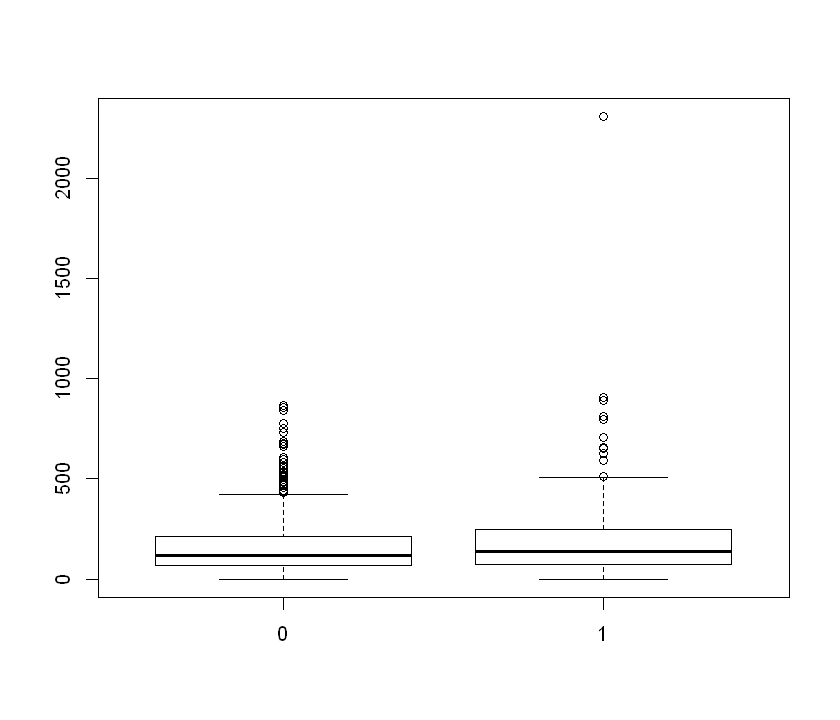

In [164]:
boxplot(data$Max.PRCP.~data$box)

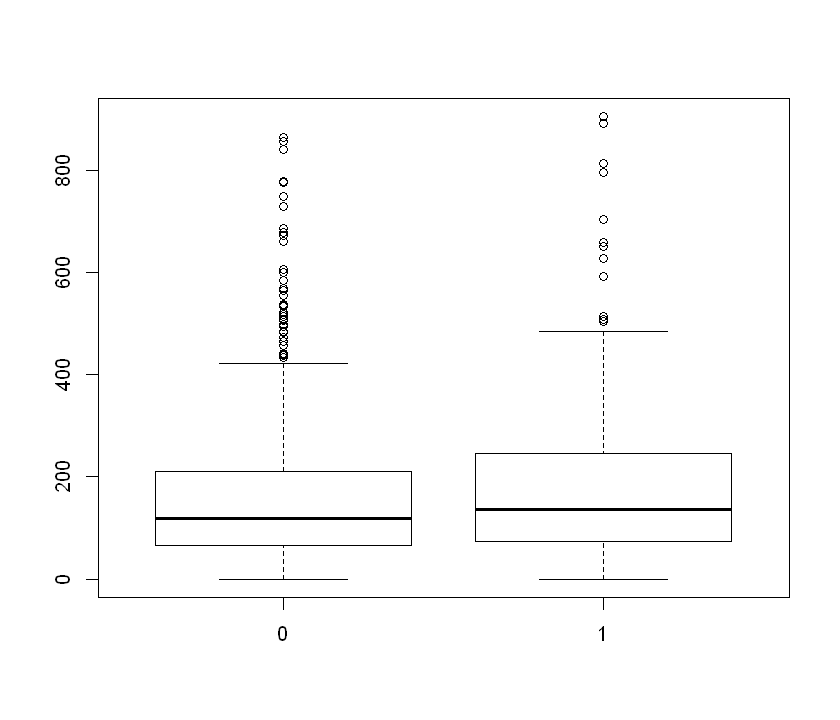

In [165]:
boxplot(data2$Max.PRCP.~data2$box)

In [166]:
indicator = c(rep(0,1007),rep(1,373))

In [167]:
length(indicator)

[1] 1380

In [168]:
1380/12

[1] 115

In [169]:
meansBox = as.data.frame(cbind(smoothTS,indicator))

In [170]:
meansBoxSea = as.data.frame(cbind(smoothTS, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),115)))

In [171]:
names(meansBoxSea) = c("precipitation","month")

In [172]:
setEPS()
postscript("pics/box.eps")
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")
dev.off()

png 
  2

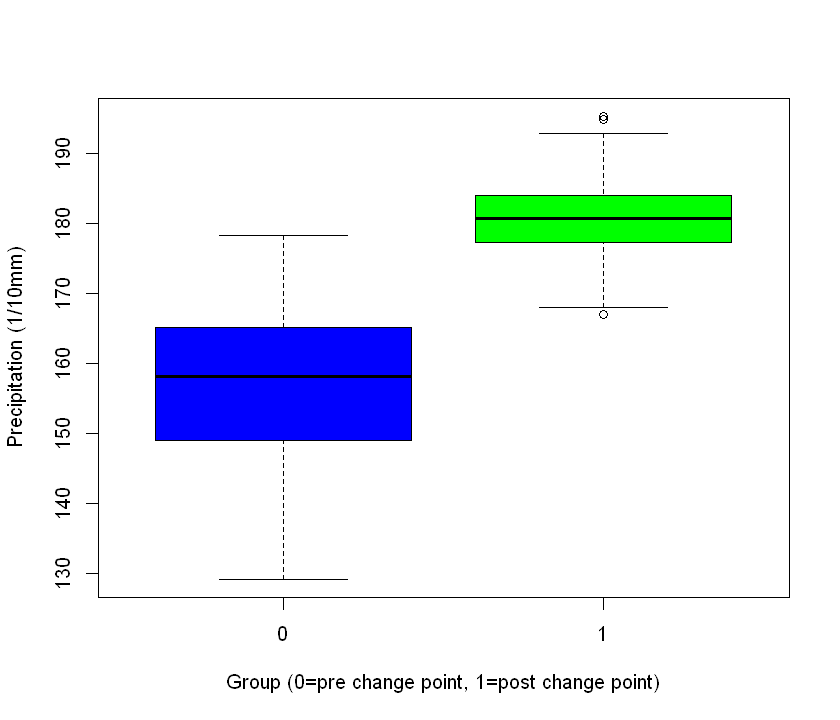

In [173]:
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

In [174]:
indicator2 = c(rep(0,1007),rep(1,397))

In [175]:
length(indicator2)/12

[1] 117

In [176]:
meansBox2 = as.data.frame(cbind(smoothTS2,indicator2))

In [177]:
meansBoxSea2 = as.data.frame(cbind(smoothTS2, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),117)))

In [178]:
names(meansBoxSea2) = c("precipitation","month")

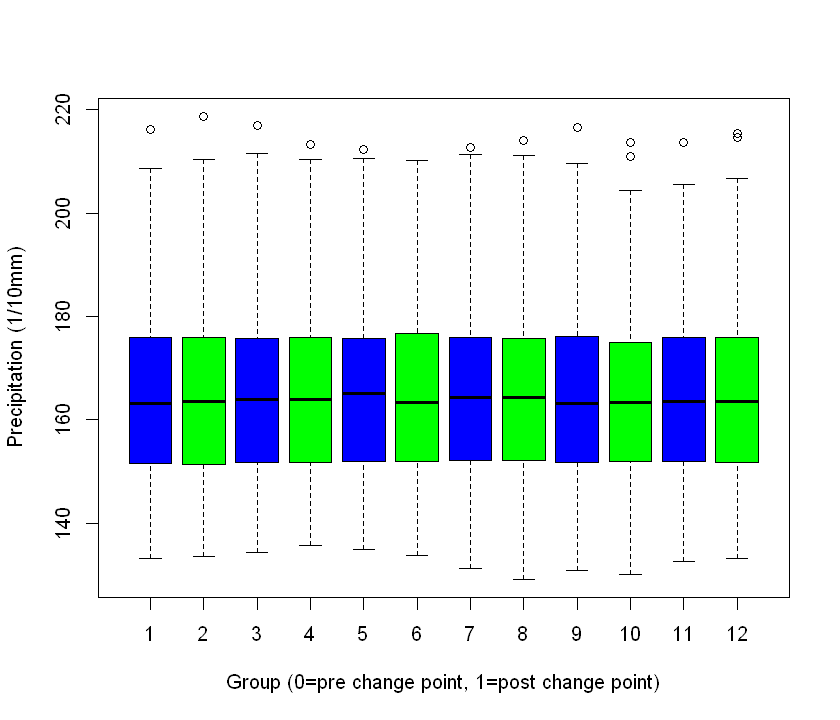

In [179]:
boxplot(meansBoxSea2$precipitation ~ meansBoxSea2$month, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

In [180]:
monthly = NULL
for(i in 1:12){
    monthly = cbind(monthly,data2[which(data2$MONTH==i),"Max.PRCP."])
}
monthlyDF = as.data.frame(monthly)
colnames(monthlyDF) = c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec")

In [181]:
sum(na.omit(data2$Max.PRCP. > 914))

[1] 0

In [182]:
require(ggplot2)

Loading required package: ggplot2


In [183]:
x = seq(1:nrow(data))

In [184]:
smoothJan = ts(monthlyDF$jan,start=1898)
smoothFeb = ts(monthlyDF$feb,start=1898)
smoothMar = ts(monthlyDF$mar,start=1898)
smoothApr = ts(monthlyDF$apr,start=1898)

smoothMay = ts(monthlyDF$may,start=1898)
smoothJune = ts(monthlyDF$june,start=1898)
smoothJuly = ts(monthlyDF$july,start=1898)
smoothAug = ts(monthlyDF$aug,start=1898)

smoothSept = ts(monthlyDF$sept,start=1898)
smoothOct = ts(monthlyDF$oct,start=1898)
smoothNov = ts(monthlyDF$nov,start=1898)
smoothDec = ts(monthlyDF$dec,start=1898)

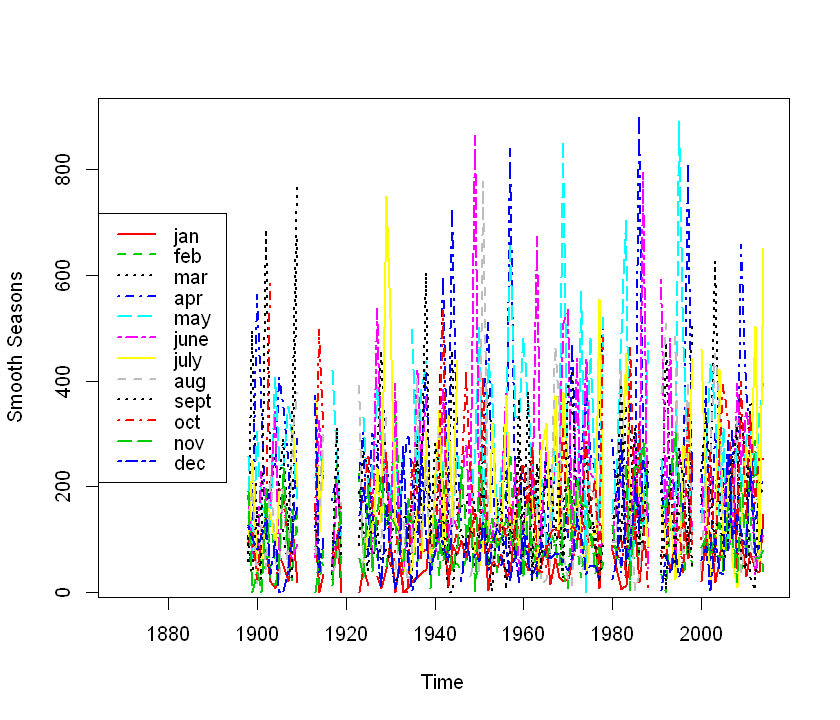

In [185]:
plot(smoothJan,col=2,ylim=c(25,900),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=2)
lines(smoothMar, lwd=2, lty=3)
lines(smoothApr,col=4, lwd=2, lty=4)

lines(smoothMay,col=5, lwd=2, lty=5)
lines(smoothJune,col=6, lwd=2, lty=6)
lines(smoothJuly,col=7, lwd=2, lty=7)
lines(smoothAug,col=8, lwd=2, lty=8)

lines(smoothSept,col=9, lwd=2, lty=9)
lines(smoothOct,col=10, lwd=2, lty=10)
lines(smoothNov,col=11, lwd=2, lty=11)
lines(smoothDec,col=12, lwd=2, lty=12)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,2,3,4,5,6,7,8,9,10,11,12),inset=c(0,0),
      lwd=c(rep(2,12)))

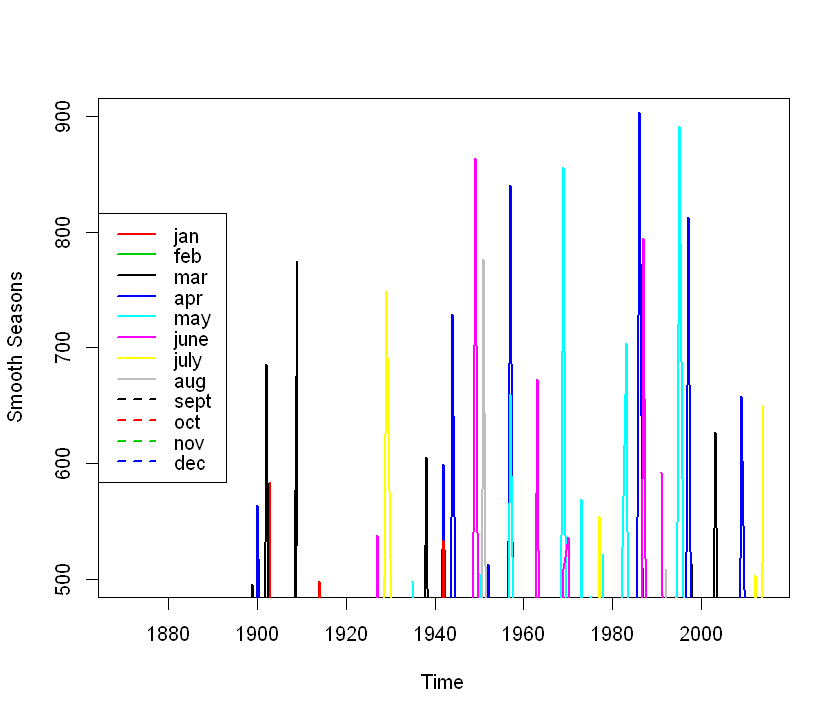

In [186]:
plot(smoothJan,col=2,ylim=c(500,900),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=1)
lines(smoothMar, lwd=2, lty=1)
lines(smoothApr,col=4, lwd=2, lty=1)

lines(smoothMay,col=5, lwd=2, lty=1)
lines(smoothJune,col=6, lwd=2, lty=1)
lines(smoothJuly,col=7, lwd=2, lty=1)
lines(smoothAug,col=8, lwd=2, lty=1)

lines(smoothSept,col=9, lwd=2, lty=1)
lines(smoothOct,col=10, lwd=2, lty=1)
lines(smoothNov,col=11, lwd=2, lty=1)
lines(smoothDec,col=12, lwd=2, lty=1)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=(c(rep(1,8),2,2,2,2)),inset=c(0,0),
      lwd=c(rep(2,12)))

In [187]:
smoothJan = ts(runmean(monthlyDF$jan,10),start=1898)
smoothFeb = ts(runmean(monthlyDF$feb,10),start=1898)
smoothMar = ts(runmean(monthlyDF$mar,10),start=1898)
smoothApr = ts(runmean(monthlyDF$apr,10),start=1898)

smoothMay = ts(runmean(monthlyDF$may,10),start=1898)
smoothJune = ts(runmean(monthlyDF$june,10),start=1898)
smoothJuly = ts(runmean(monthlyDF$july,10),start=1898)
smoothAug = ts(runmean(monthlyDF$aug,10),start=1898)

smoothSept = ts(runmean(monthlyDF$sept,10),start=1898)
smoothOct = ts(runmean(monthlyDF$oct,10),start=1898)
smoothNov = ts(runmean(monthlyDF$nov,10),start=1898)
smoothDec = ts(runmean(monthlyDF$dec,10),start=1898)

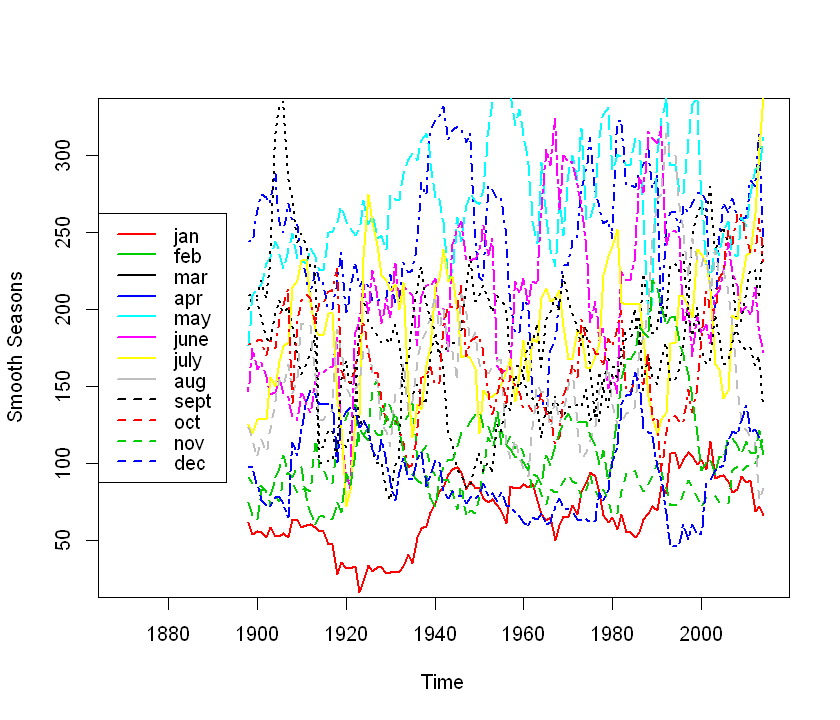

In [188]:
plot(smoothJan,col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=2)
lines(smoothMar, lwd=2, lty=3)
lines(smoothApr,col=4, lwd=2, lty=4)

lines(smoothMay,col=5, lwd=2, lty=5)
lines(smoothJune,col=6, lwd=2, lty=6)
lines(smoothJuly,col=7, lwd=2, lty=7)
lines(smoothAug,col=8, lwd=2, lty=8)

lines(smoothSept,col=9, lwd=2, lty=9)
lines(smoothOct,col=10, lwd=2, lty=10)
lines(smoothNov,col=11, lwd=2, lty=11)
lines(smoothDec,col=12, lwd=2, lty=12)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)))

In [189]:
smoothJan40 = ts(runmean(monthlyDF$jan,40),start=1898)
smoothFeb40 = ts(runmean(monthlyDF$feb,40),start=1898)
smoothMar40 = ts(runmean(monthlyDF$mar,40),start=1898)
smoothApr40 = ts(runmean(monthlyDF$apr,40),start=1898)

smoothMay40 = ts(runmean(monthlyDF$may,40),start=1898)
smoothJune40 = ts(runmean(monthlyDF$june,40),start=1898)
smoothJuly40 = ts(runmean(monthlyDF$july,40),start=1898)
smoothAug40 = ts(runmean(monthlyDF$aug,40),start=1898)

smoothSept40 = ts(runmean(monthlyDF$sept,40),start=1898)
smoothOct40 = ts(runmean(monthlyDF$oct,40),start=1898)
smoothNov40 = ts(runmean(monthlyDF$nov,40),start=1898)
smoothDec40 = ts(runmean(monthlyDF$dec,40),start=1898)

In [190]:
options(repr.plot.width=7, repr.plot.height=6) #reduces the plot sizes

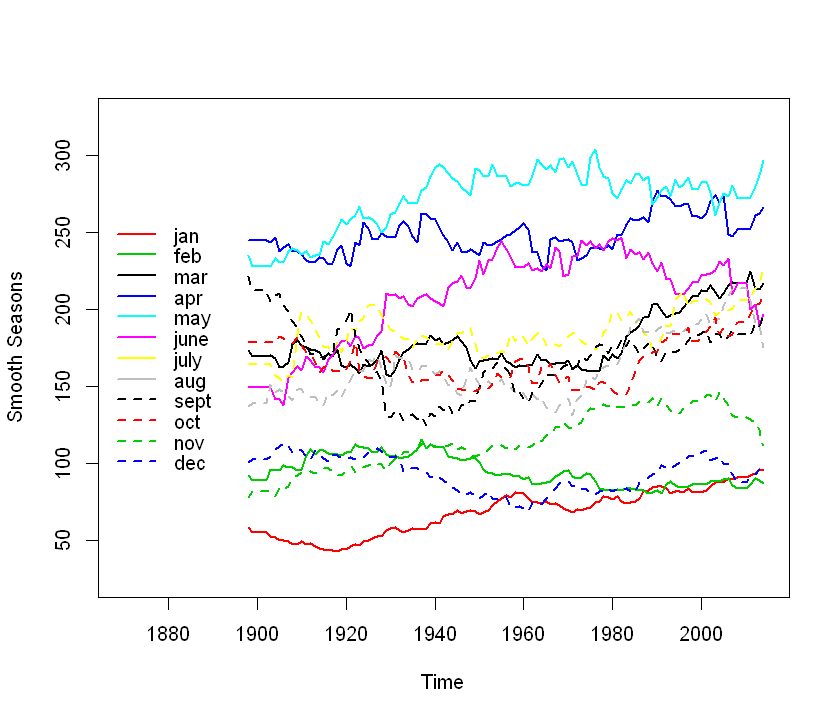

In [191]:
plot(smoothJan40,col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb40,col=3, lwd=2, lty=1)
lines(smoothMar40, lwd=2, lty=1)
lines(smoothApr40,col=4, lwd=2, lty=1)

lines(smoothMay40,col=5, lwd=2, lty=1)
lines(smoothJune40,col=6, lwd=2, lty=1)
lines(smoothJuly40,col=7, lwd=2, lty=2)
lines(smoothAug40,col=8, lwd=2, lty=2)

lines(smoothSept40,col=9, lwd=2, lty=2)
lines(smoothOct40,col=10, lwd=2, lty=2)
lines(smoothNov40,col=11, lwd=2, lty=2)
lines(smoothDec40,col=12, lwd=2, lty=2)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)), bty="n")

In [192]:
options(repr.plot.width=8, repr.plot.height=20) #reduces the plot sizes

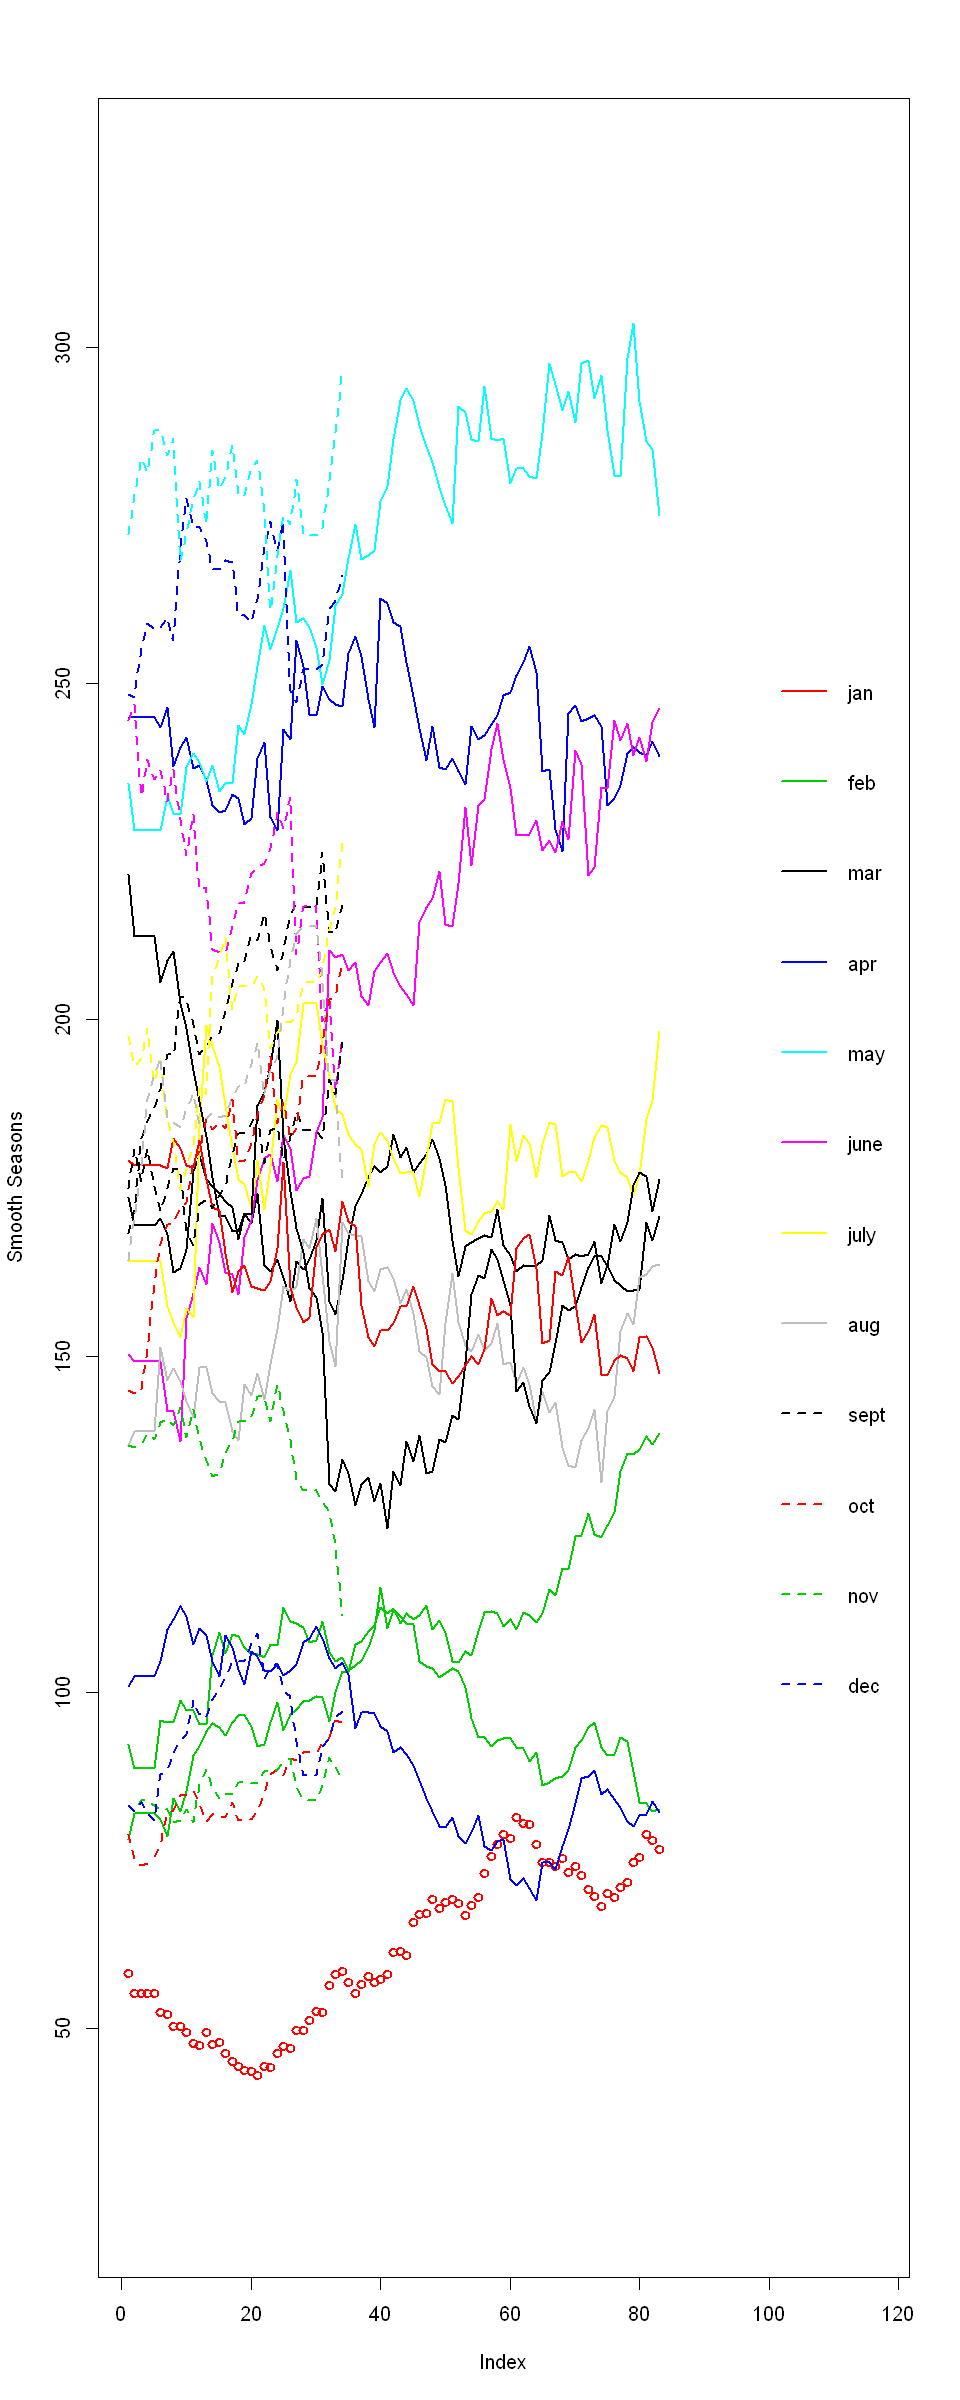

In [193]:
plot(smoothJan40[1:83],col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1, xlim=c(1,117))
lines(smoothFeb40[1:83],col=3, lwd=2, lty=1)
lines(smoothMar40[1:83], lwd=2, lty=1)
lines(smoothApr40[1:83],col=4, lwd=2, lty=1)

lines(smoothMay40[1:83],col=5, lwd=2, lty=1)
lines(smoothJune40[1:83],col=6, lwd=2, lty=1)
lines(smoothJuly40[1:83],col=7, lwd=2, lty=1)
lines(smoothAug40[1:83],col=8, lwd=2, lty=1)

lines(smoothSept40[1:83],col=9, lwd=2, lty=1)
lines(smoothOct40[1:83],col=10, lwd=2, lty=1)
lines(smoothNov40[1:83],col=11, lwd=2, lty=1)
lines(smoothDec40[1:83],col=12, lwd=2, lty=1)

lines(smoothJan40[84:117],col=2,lwd=2, lty=2)
lines(smoothFeb40[84:117],col=3, lwd=2, lty=2)
lines(smoothMar40[84:117], lwd=2, lty=2)
lines(smoothApr40[84:117],col=4, lwd=2, lty=2)

lines(smoothMay40[84:117],col=5, lwd=2, lty=2)
lines(smoothJune40[84:117],col=6, lwd=2, lty=2)
lines(smoothJuly40[84:117],col=7, lwd=2, lty=2)
lines(smoothAug40[84:117],col=8, lwd=2, lty=2)

lines(smoothSept40[84:117],col=9, lwd=2, lty=2)
lines(smoothOct40[84:117],col=10, lwd=2, lty=2)
lines(smoothNov40[84:117],col=11, lwd=2, lty=2)
lines(smoothDec40[84:117],col=12, lwd=2, lty=2)

legend("right",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)), bty="n")

In [194]:
tester = NULL
tester = c(smoothJan40,smoothFeb40,smoothMar40,smoothApr40,smoothMay40,smoothJune40,smoothJuly40,smoothAug40,
           smoothSept40,smoothOct40,smoothNov40,smoothDec40)

In [195]:
monthsTest = NULL
for(i in 1:12){
    monthsTest = c(monthsTest,rep(i,117))
}

In [196]:
counter = NULL
for(i in 1:12){
    counter = c(counter,rep(0,83),rep(1,(117-83)))
}

In [197]:
2014-116

[1] 1898

In [198]:
boxPlotForMonthsData[1,]

ERROR: Error in eval(expr, envir, enclos): object 'boxPlotForMonthsData' not found


In [199]:
boxPlotForMonthsData = as.data.frame(cbind(tester,monthsTest,counter))

In [200]:
names(boxPlotForMonthsData) = c("smoothPrecip","months","counter")

In [239]:
options(repr.plot.width=9, repr.plot.height=7) #reduces the plot sizes

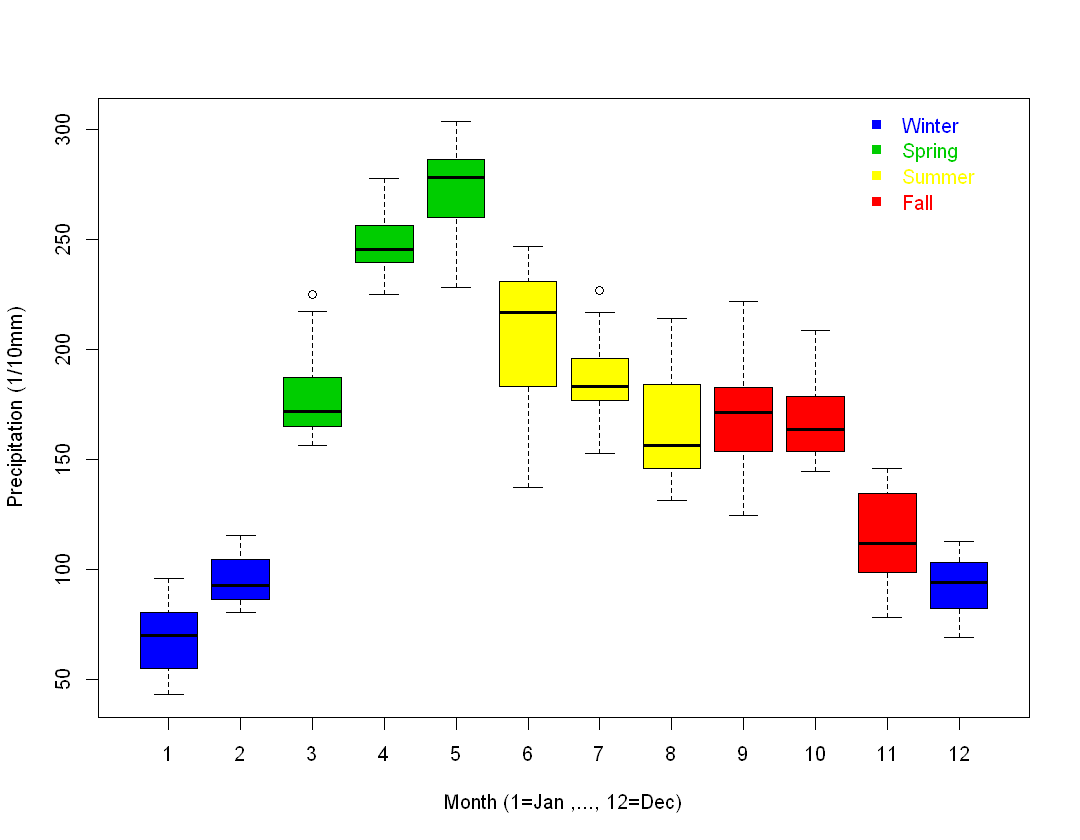

In [240]:
boxplot(boxPlotForMonthsData$smoothPrecip ~ boxPlotForMonthsData$months, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,3,3,3,7,7,7,2,2,2,4), ylab = "Precipitation (1/10mm)")
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)

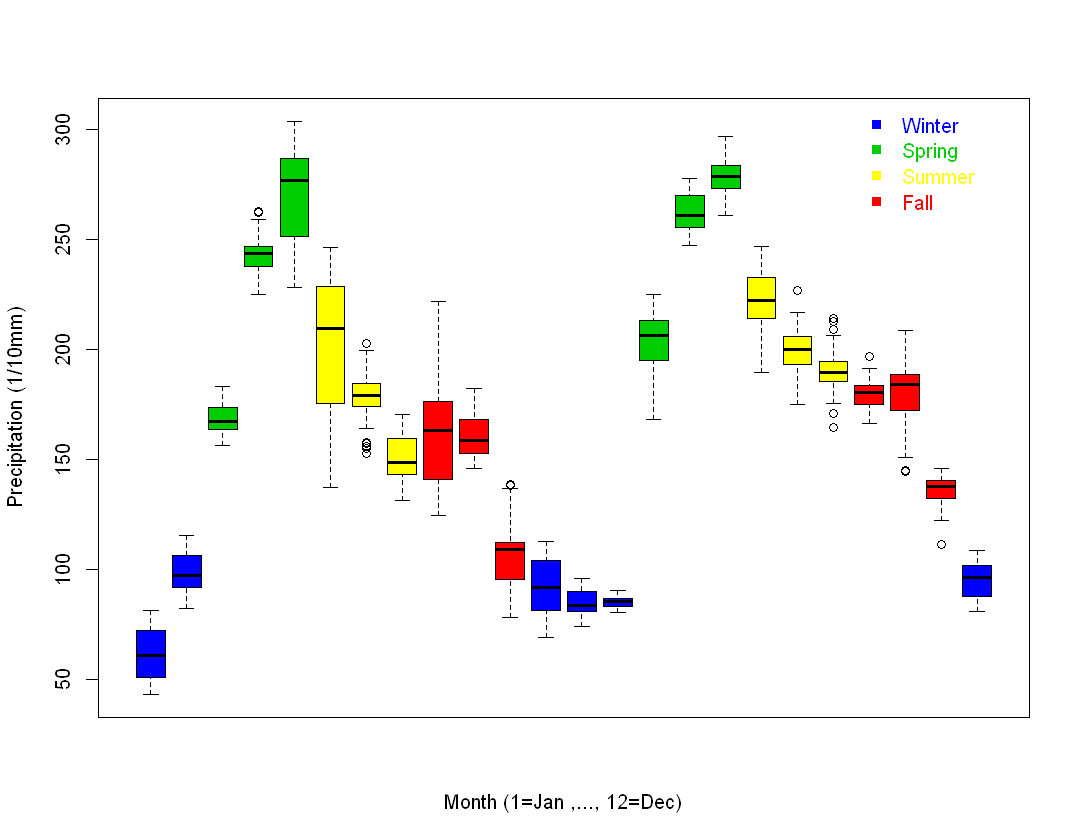

In [203]:
boxplot(boxPlotForMonthsData$smoothPrecip ~ boxPlotForMonthsData$months + boxPlotForMonthsData$counter, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,3,3,3,7,7,7,2,2,2,4), ylab = "Precipitation (1/10mm)", xaxt="n")
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)

Warning message:
: Removed 166 rows containing missing values (geom_point).

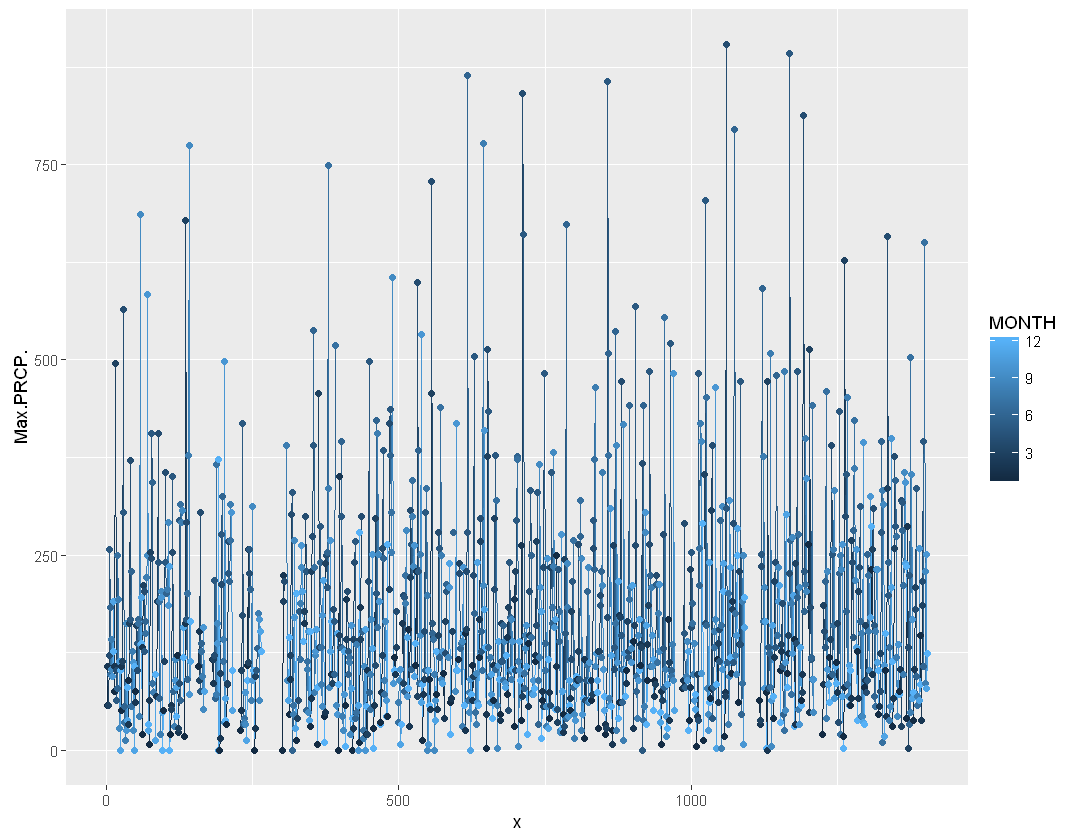

In [204]:
ggplot(data2, aes(x, Max.PRCP.,colour=MONTH)) + 
    geom_line() + 
    geom_point()

In [205]:
options(repr.plot.width=6, repr.plot.height=4) #reduces the plot sizes

In [206]:
smoothJan = ts(monthlyDF$jan,start=1898)
smoothFeb = ts(monthlyDF$feb,start=1898)
smoothMar = ts(monthlyDF$mar,start=1898)
smoothApr = ts(monthlyDF$apr,start=1898)

smoothMay = ts(monthlyDF$may,start=1898)
smoothJune = ts(monthlyDF$june,start=1898)
smoothJuly = ts(monthlyDF$july,start=1898)
smoothAug = ts(monthlyDF$aug,start=1898)

smoothSept = ts(monthlyDF$sept,start=1898)
smoothOct = ts(monthlyDF$oct,start=1898)
smoothNov = ts(monthlyDF$nov,start=1898)
smoothDec = ts(monthlyDF$dec,start=1898)

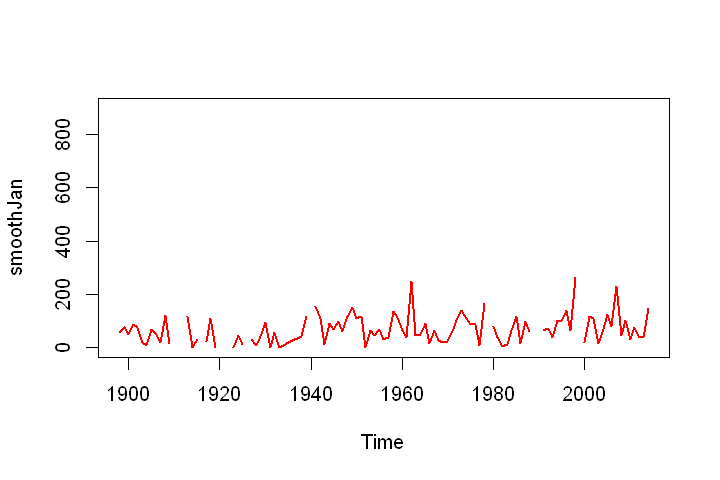

In [207]:
plot(smoothJan, ylim=c(0,900), lwd=2, lty=1, col=2)

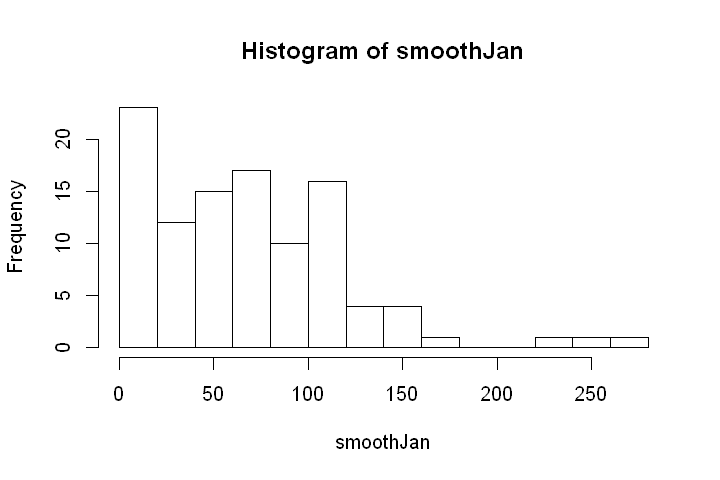

In [208]:
hist(smoothJan,breaks=10)

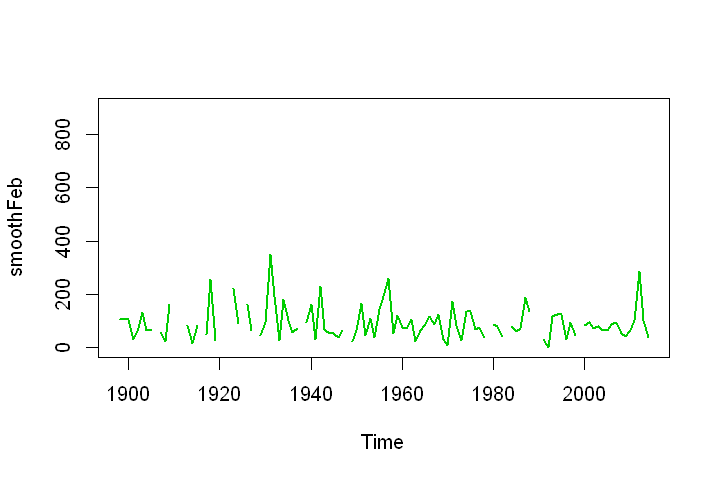

In [209]:
plot(smoothFeb, ylim=c(0,900), lwd=2, lty=1, col=3)

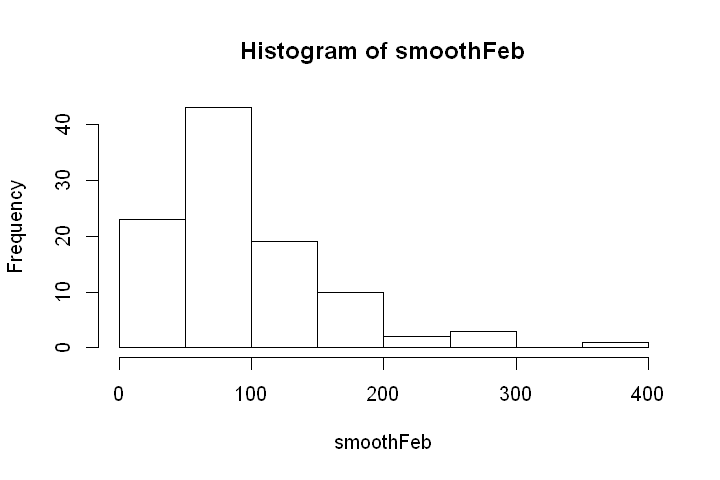

In [210]:
hist(smoothFeb,breaks=10)

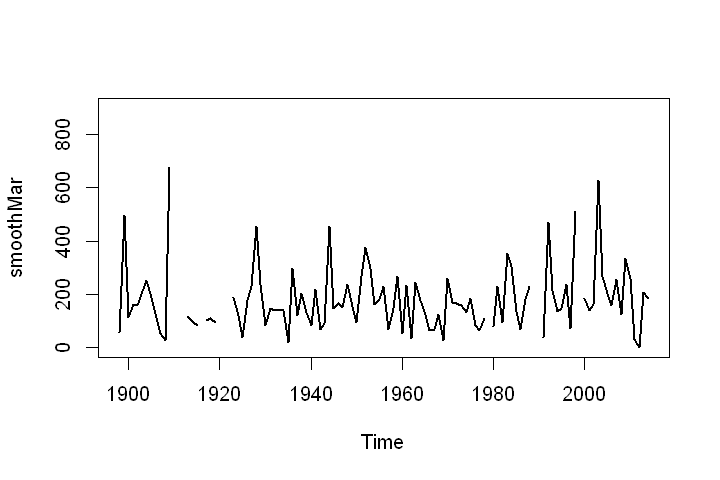

In [211]:
plot(smoothMar, ylim=c(0,900), lwd=2, lty=1, col=1)

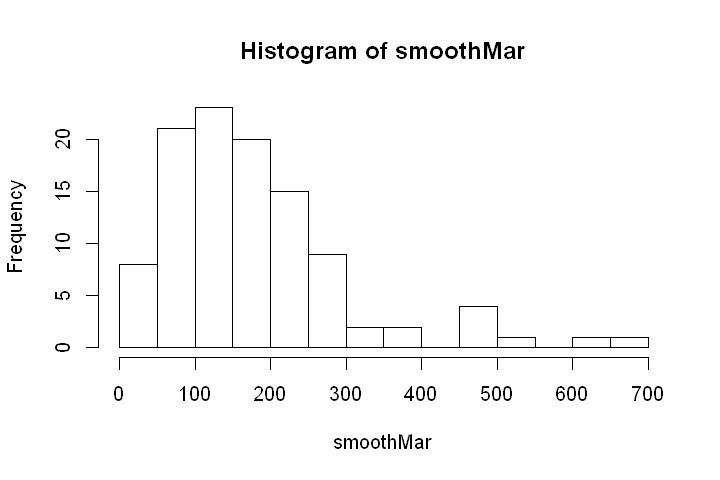

In [212]:
hist(smoothMar,breaks=10)

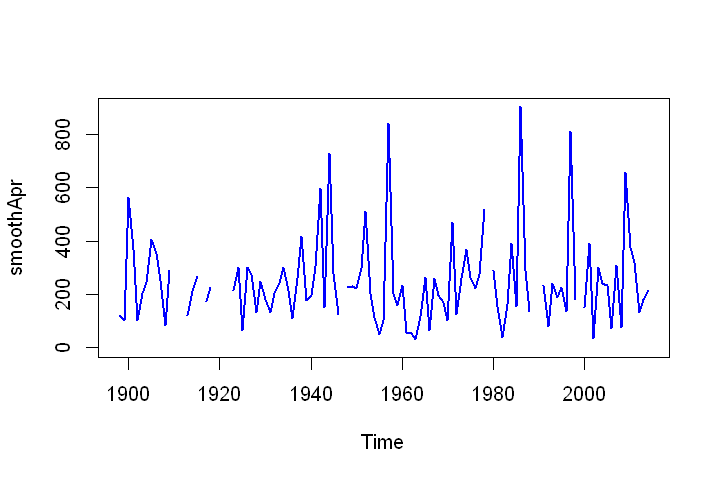

In [213]:
plot(smoothApr, ylim=c(0,900), lwd=2, lty=1, col=4)

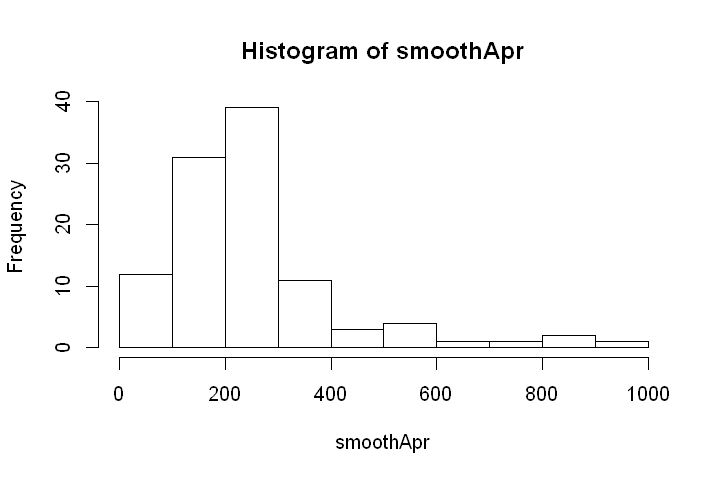

In [214]:
hist(smoothApr,breaks=10)

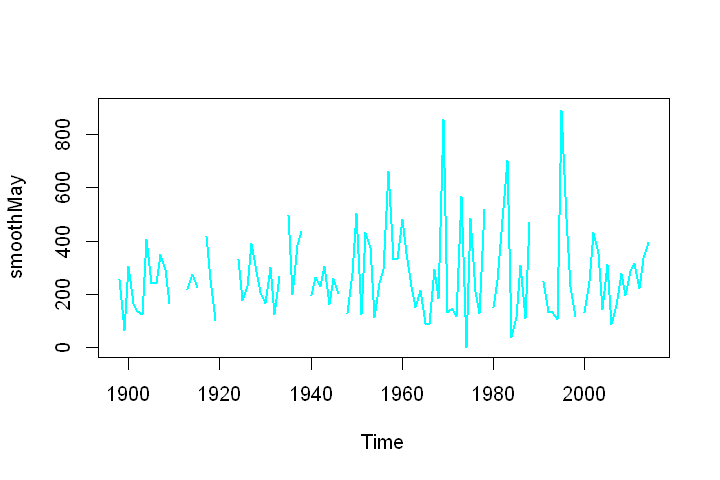

In [215]:
plot(smoothMay, ylim=c(0,900), lwd=2, lty=1, col=5)

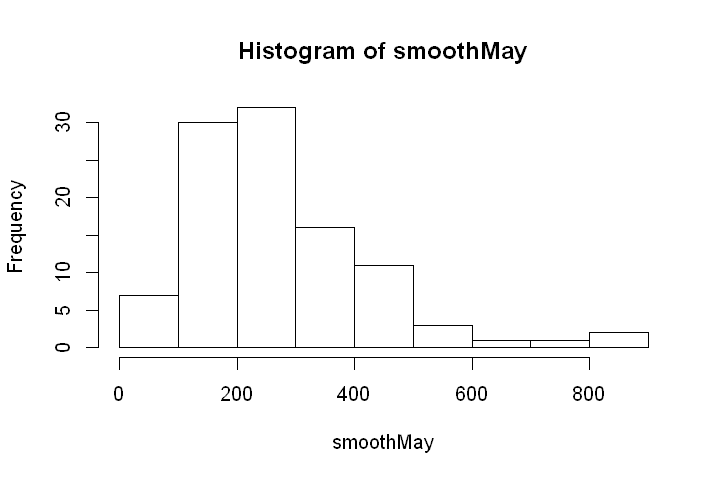

In [216]:
hist(smoothMay,breaks=10)

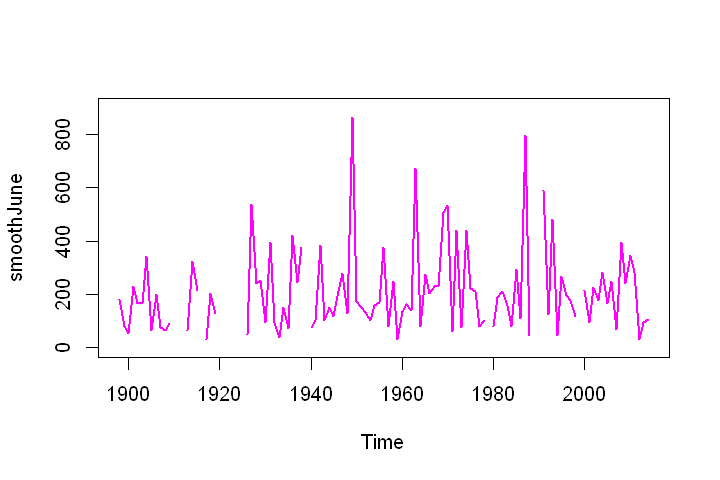

In [217]:
plot(smoothJune, ylim=c(0,900), lwd=2, lty=1, col=6)

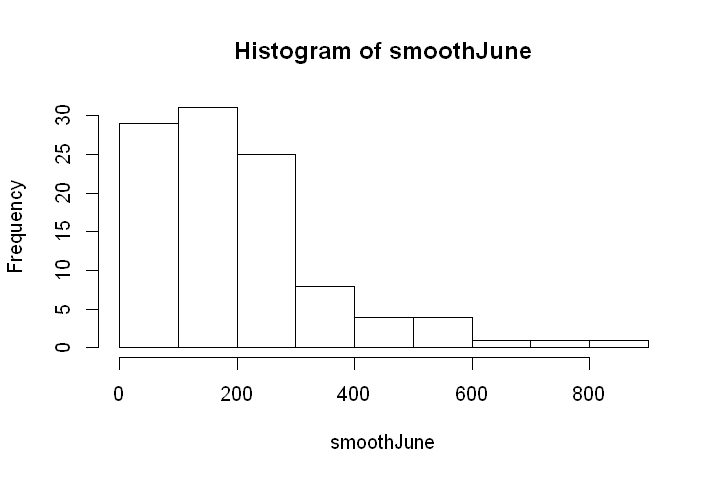

In [218]:
hist(smoothJune,breaks=10)

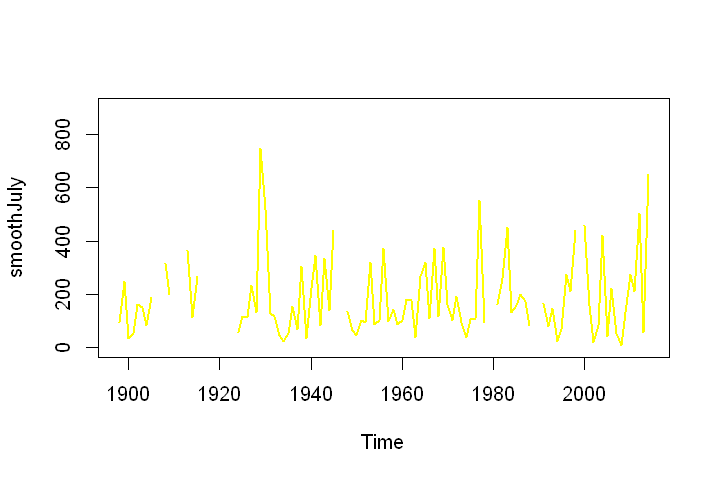

In [219]:
plot(smoothJuly, ylim=c(0,900), lwd=2, lty=1, col=7)

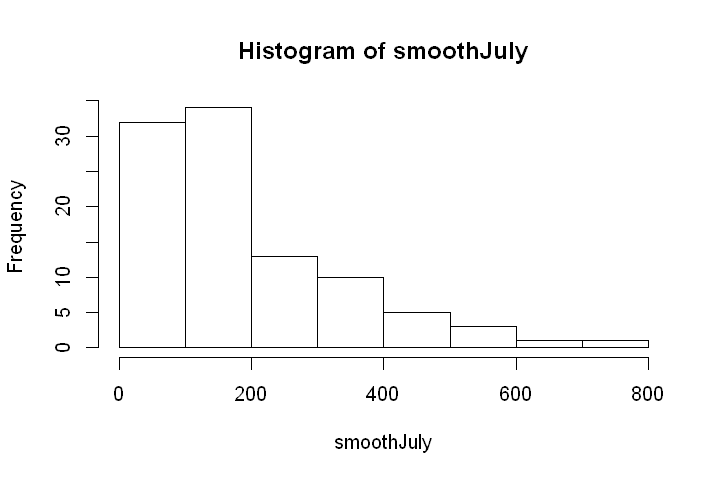

In [220]:
hist(smoothJuly,breaks=10)

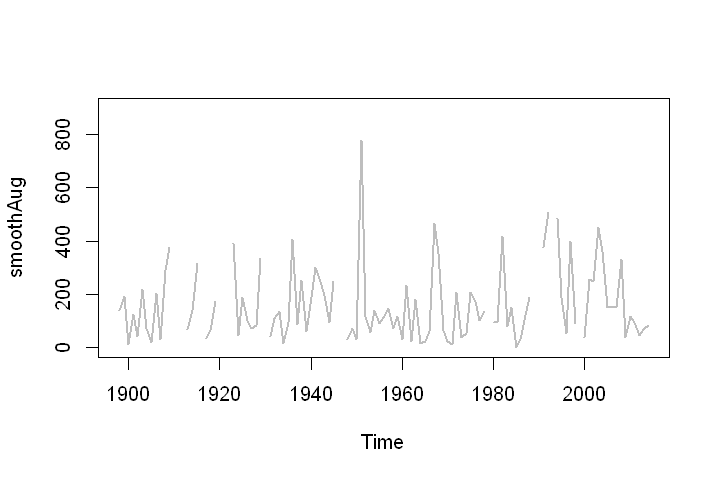

In [221]:
plot(smoothAug, ylim=c(0,900), lwd=2, lty=1, col=8)

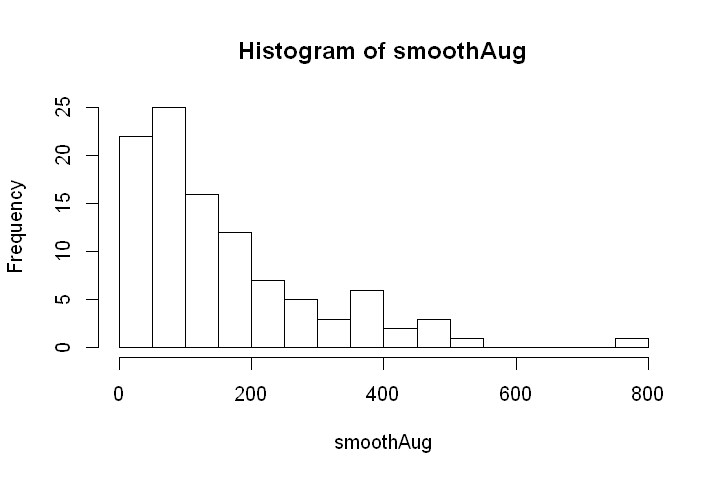

In [222]:
hist(smoothAug,breaks=20)

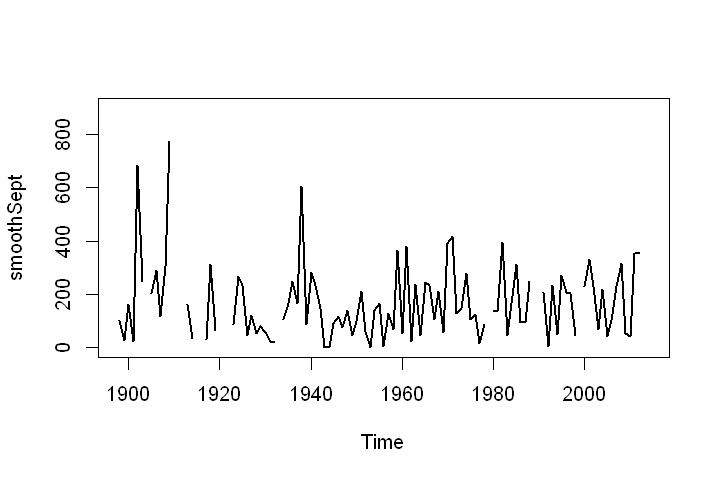

In [223]:
plot(smoothSept, ylim=c(0,900), lwd=2, lty=1, col=9)

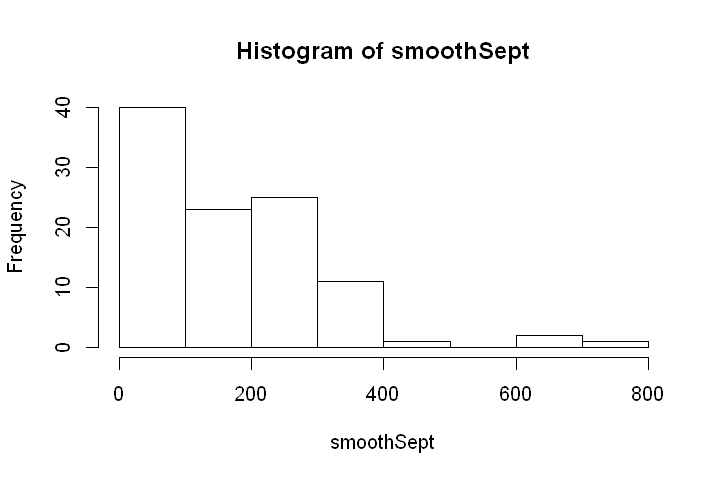

In [224]:
hist(smoothSept,breaks=10)

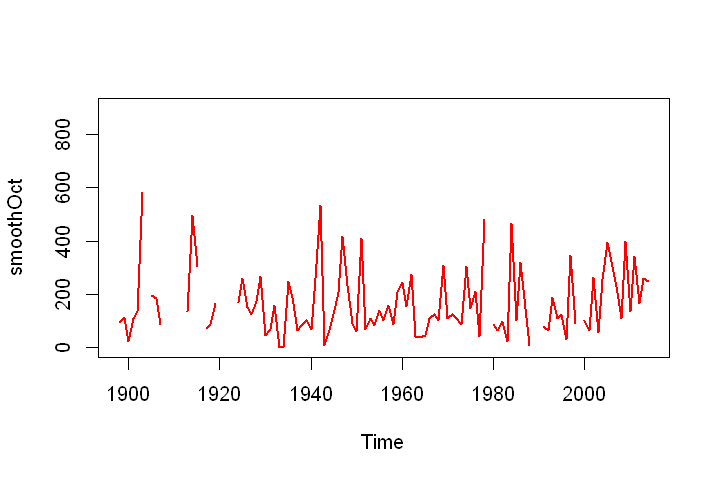

In [225]:
plot(smoothOct, ylim=c(0,900), lwd=2, lty=1, col=10)

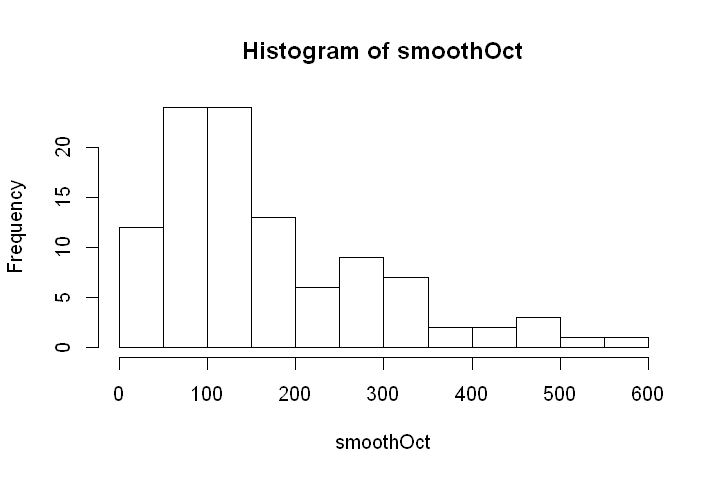

In [226]:
hist(smoothOct,breaks=10)

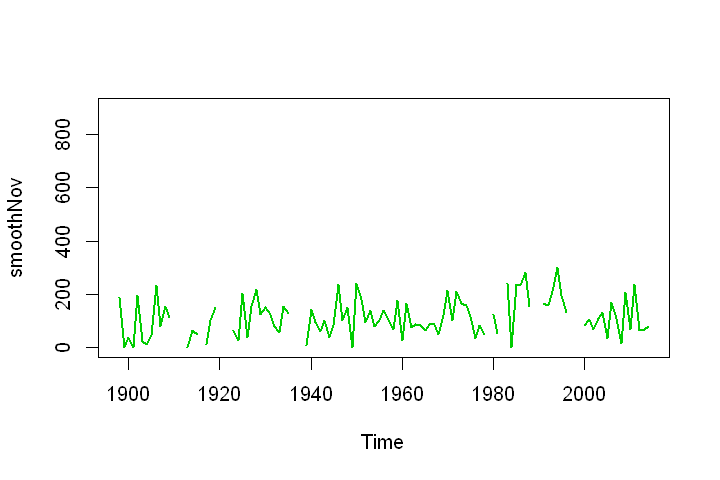

In [227]:
plot(smoothNov, ylim=c(0,900), lwd=2, lty=1, col=11)

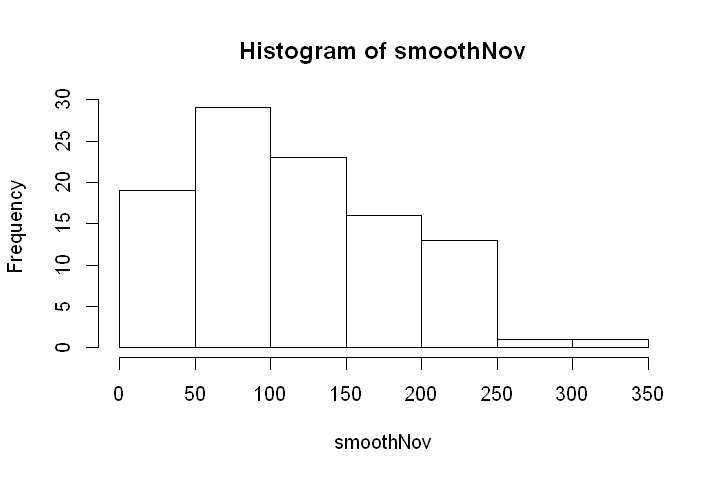

In [228]:
hist(smoothNov,breaks=10)

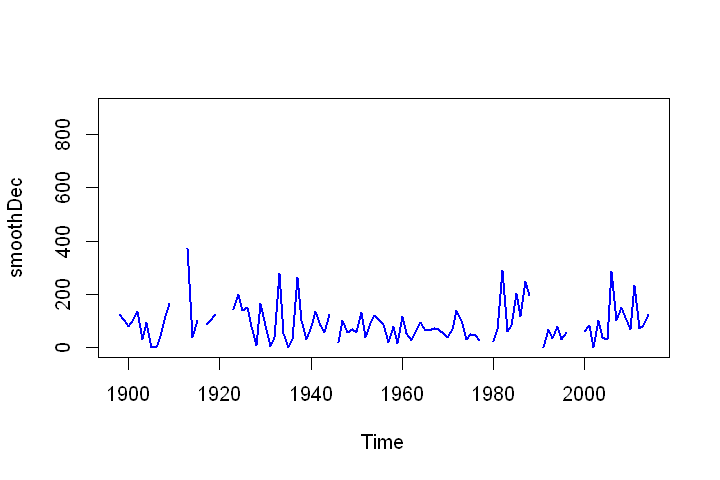

In [229]:
plot(smoothDec, ylim=c(0,900), lwd=2, lty=1, col=12)

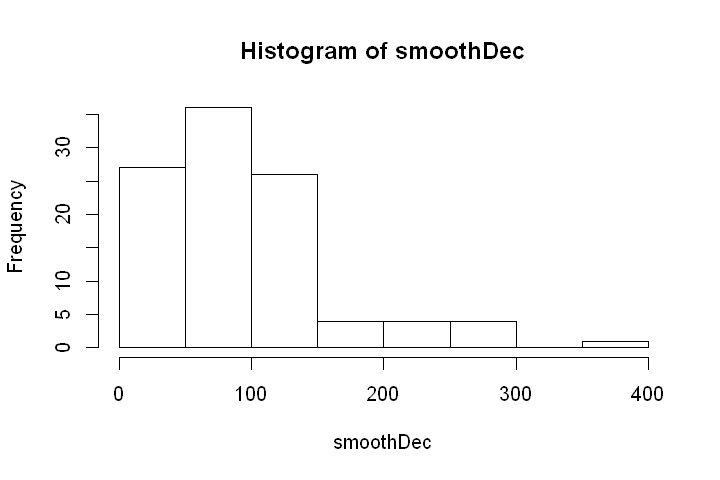

In [230]:
hist(smoothDec,breaks=10)

Flood tolerance, probabilities from selected distributions, bayesian updated (last add)

Change point detection

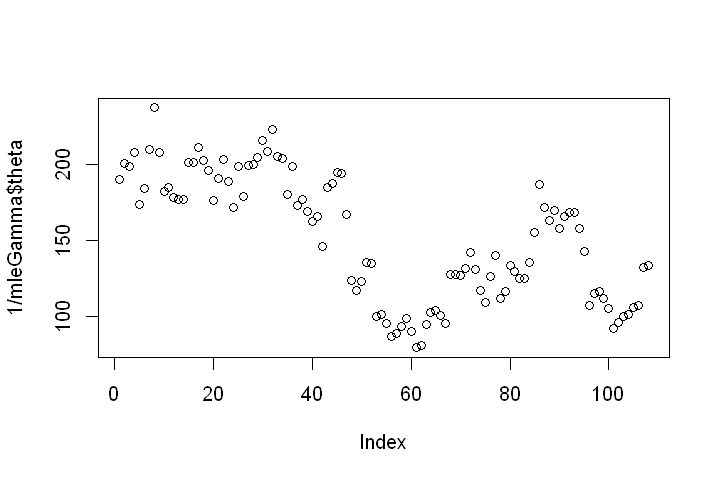

In [231]:
plot(1/mleGamma$theta)

In [232]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
0.7662871,0.005275478,0.1624008,rejected,0.8356680,NA,5.196257,NA,189.5563,145.2545,27533.91,165.9334
0.7426182,0.004984634,0.1442263,rejected,0.6983310,NA,4.539886,NA,200.6165,148.9815,29888.15,172.8819
0.8177342,0.005041738,0.1125168,not rejected,0.4371900,NA,2.975561,NA,198.3443,162.1929,32170.04,179.3601
0.7992070,0.004814416,0.1317502,not rejected,0.5563920,NA,3.534812,NA,207.7095,166.0029,34480.39,185.6889
0.9615450,0.005770623,0.1192384,not rejected,0.3512189,NA,2.309947,NA,173.2915,166.6276,28875.14,169.9269
0.9000838,0.005426620,0.1287402,not rejected,0.3326784,NA,2.205959,NA,184.2768,165.8645,30564.98,174.8284


In [233]:
x = seq(.00001,2500,1)

In [234]:
1963-1897

[1] 66

In [235]:
y = dgamma(x,mleGamma$alpha[66], scale=(1/mleGamma$theta[66]))

In [236]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

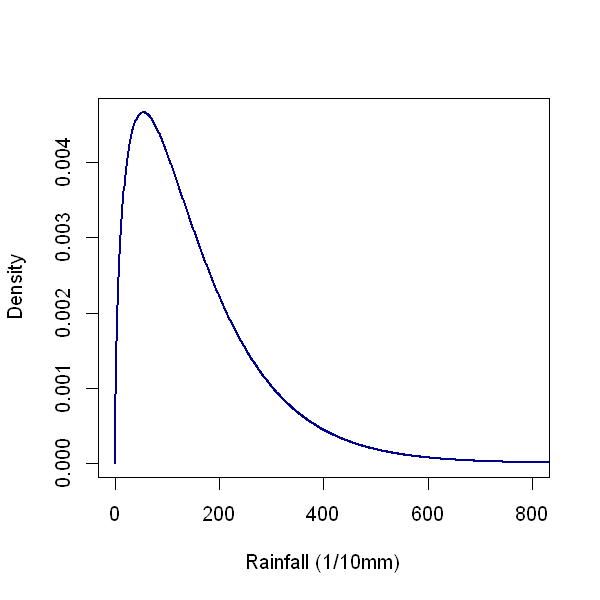

In [237]:
plot(x,y, col = "darkblue", type ="l", xlim=c(0,800), ylab="Density", xlab="Rainfall (1/10mm)", lwd=2)

In [238]:
y = dexp(1/mleExp$theta[20])

In [ ]:
plot(x,y, col = "darkblue", type ="l", xlim=c(0,800), ylab="Density", xlab="Rainfall (1/10mm)", lwd=2)

jpeg(file = “C://R//SAVEHERE//myplot.jpeg”)
plot(x,y)
dev.off()